# Yellow Taxi Trip Records

Dataset from https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

Dataset year: 2019 (December only)

Data dictionary: https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

The data dictionary is also available in the "files" folder at the repo (https://github.com/chicolucio-forks/curso_data_science_pro).

## Package versions

The main packages used in this study and their versions:

In [1]:
%load_ext version_information

In [2]:
%version_information pandas, numpy, matplotlib, seaborn, geopandas, version_information

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.13.0
OS Linux 5.3.0 62 generic x86_64 with debian buster sid
pandas 1.0.3
numpy 1.18.1
matplotlib 3.2.1
seaborn 0.10.1
geopandas 0.8.0
version_information 1.0.3
Sat Jul 11 12:26:13 2020 -03

# Settings and importing data

In [3]:
import pandas as pd
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import geopandas as gpd
sns.set()  # https://seaborn.pydata.org/generated/seaborn.set.html

Since is a larga dataset, let's print the time elapsed to create a pandas dataframe. 

In [4]:
start = datetime.now()
df = pd.read_csv('../data/yellow_tripdata_2019-12.csv')
print(datetime.now() - start)

/opt/anaconda/anaconda3/envs/curso_datascience/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0:00:09.499886


# Getting to know the data

In [5]:
df.shape

(6896317, 18)

In [6]:
df.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [7]:
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.2,1.0,N,142,116,2.0,14.5,3.0,0.5,0.0,0.0,0.3,18.3,2.5
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.4,1.0,N,138,25,1.0,28.5,0.5,0.5,10.0,0.0,0.3,39.8,0.0
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.6,1.0,N,161,237,2.0,9.0,3.0,0.5,0.0,0.0,0.3,12.8,2.5


In [8]:
df.tail()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6896312,NaN,2019-12-31 00:07:00,2019-12-31 00:46:00,NaN,12.78,NaN,NaN,230,72,NaN,32.32,2.75,0.5,0.0,6.12,0.3,41.99,0.0
6896313,NaN,2019-12-31 00:20:00,2019-12-31 00:47:00,NaN,18.52,NaN,NaN,219,32,NaN,51.63,2.75,0.5,0.0,6.12,0.3,61.30,0.0
6896314,NaN,2019-12-31 00:50:00,2019-12-31 01:21:00,NaN,13.13,NaN,NaN,161,76,NaN,38.02,2.75,0.5,0.0,6.12,0.3,47.69,0.0
6896315,NaN,2019-12-31 00:38:19,2019-12-31 01:19:37,NaN,14.51,NaN,NaN,230,21,NaN,41.86,2.75,0.0,0.0,6.12,0.3,51.03,0.0
6896316,NaN,2019-12-31 00:21:00,2019-12-31 00:56:00,NaN,-17.16,NaN,NaN,193,219,NaN,44.62,2.75,0.5,0.0,0.00,0.3,48.17,0.0


In [9]:
df.dtypes

vendorid                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
ratecodeid               float64
store_and_fwd_flag        object
pulocationid               int64
dolocationid               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896317 entries, 0 to 6896316
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   vendorid               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   ratecodeid             float64
 6   store_and_fwd_flag     object 
 7   pulocationid           int64  
 8   dolocationid           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 947.1+ MB


`tpep_pickup_datetime`and `tpep_dropoff_datetime` should be datetime type... something to fix later.

NaN values... something to look at.

In [11]:
df.describe()

,vendorid,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.845299e+06,6.845299e+06,6.896317e+06,6.845299e+06,6.896317e+06,6.896317e+06,6.845299e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.896317e+06
mean,1.666457e+00,1.550877e+00,2.973421e+00,1.065756e+00,1.636525e+02,1.614892e+02,1.298993e+00,1.359027e+01,1.108518e+00,4.924147e-01,2.244620e+00,3.881238e-01,2.979857e-01,1.964165e+01,2.275278e+00
std,4.714787e-01,1.174330e+00,1.643113e+01,9.309870e-01,6.605758e+01,7.033753e+01,4.879401e-01,1.522692e+02,1.259892e+00,7.233857e-02,2.875127e+00,1.715502e+00,3.381444e-02,1.525236e+02,7.359669e-01
min,1.000000e+00,0.000000e+00,-3.726453e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.472000e+03,-4.500000e+00,-5.000000e-01,-2.008000e+02,-4.050000e+01,-3.000000e-01,-1.472800e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.250000e+02,1.120000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,1.920000e+00,0.000000e+00,3.000000e-01,1.480000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,3.030000e+00,1.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,1.543000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.135000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,1.913018e+04,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,3.984684e+05,9.006000e+01,3.300000e+00,4.044400e+02,6.126600e+02,3.000000e-01,3.984712e+05,3.000000e+00


Let's change the float format so that the `describe` method becomes more human readable:

In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [13]:
df.describe()

,vendorid,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6845299.000,6845299.000,6896317.000,6845299.000,6896317.000,6896317.000,6845299.000,6896317.000,6896317.000,6896317.000,6896317.000,6896317.000,6896317.000,6896317.000,6896317.000
mean,1.666,1.551,2.973,1.066,163.652,161.489,1.299,13.590,1.109,0.492,2.245,0.388,0.298,19.642,2.275
std,0.471,1.174,16.431,0.931,66.058,70.338,0.488,152.269,1.260,0.072,2.875,1.716,0.034,152.524,0.736
min,1.000,0.000,-37264.530,1.000,1.000,1.000,1.000,-1472.000,-4.500,-0.500,-200.800,-40.500,-0.300,-1472.800,-2.500
25%,1.000,1.000,0.960,1.000,125.000,112.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.300,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.500,0.500,0.500,1.920,0.000,0.300,14.800,2.500
75%,2.000,2.000,3.030,1.000,233.000,234.000,2.000,15.430,2.500,0.500,3.000,0.000,0.300,21.350,2.500
max,2.000,9.000,19130.180,99.000,265.000,265.000,5.000,398468.380,90.060,3.300,404.440,612.660,0.300,398471.200,3.000


Even though all numeric columns are described as float, only `trip_distance` and the money related `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `improvement_surcharge`, `total_amount` and `congestion_surcharge` columns are actually float types. The other columns are integer ones as can be easily seen in the data dictionary. Also, the `store_and_fwd_flag` is actually a boolean column since Y or N can be easily converted to 1 or 0.

Some strange data:

- negative trip distances
- negative money related values

In [14]:
df.nunique()

vendorid                       2
tpep_pickup_datetime     2178312
tpep_dropoff_datetime    2180419
passenger_count               10
trip_distance               6259
ratecodeid                     7
store_and_fwd_flag             2
pulocationid                 261
dolocationid                 261
payment_type                   5
fare_amount                 5487
extra                         41
mta_tax                       11
tip_amount                  3786
tolls_amount                1041
improvement_surcharge          3
total_amount               12868
congestion_surcharge          11
dtype: int64

According to data dictionary:

- there should be only two vendor IDs --> OK
- there should be only 6 rate code IDs --> 7 unique values... Why?
- there are 6 payment types options --> 5 unique values. OK
- it seems that the improvement surcharge should be a fixed value (0.30) --> 3 unique values... Why?

## Pandas profiling

Using the [pandas_profiling](https://github.com/pandas-profiling/pandas-profiling) package to get more info. Since the dataset is large, the minimal option was used.

In [15]:
from pandas_profiling import ProfileReport

In [16]:
profile = ProfileReport(df, title='Pandas Profiling Report', minimal=True)
profile.to_file("nyc_taxi_report.html")  # see the file for the report

According to the profile:

- only 0.2 % of missing cells (NaN). So it may be OK to drop rows with NaN
- there are 51018 (0.7 %) rows missing vendorid, passenger_count, ratecodeid, store_and_fwd_flag and payment_type. These are the origin of the missing cells cited above.
- there are 125331 (1.8 %) trips with zero passengers. This is a driver-entered field according to the data dictionary. Things to be considered: the driver forgot to enter the value? Canceled trip? (fare = 0?)
- there are 69469 (1.0 %) trips with distance 0. This field comes from the taximeter according to the data dictionary. Canceled trips?
- there are some negative distance trips. And an extremely length trip. Errors?
- 2987 (< 0.1 %) trips with fare = 0 and some with negative fares
- some negative extra fares, MTA taxes, tips, tolls and other money related values

Since it is a large dataset, demanding a lot of memory, I will drop some columns that I do not intend to use in this analysis:

In [15]:
df = df.drop(columns=['vendorid', 'ratecodeid', 'store_and_fwd_flag', 
                      'payment_type', 'fare_amount', 'extra', 'mta_tax', 
                      'tip_amount', 'tolls_amount', 'improvement_surcharge', 
                      'congestion_surcharge'])

In [16]:
df.describe()

,passenger_count,trip_distance,pulocationid,dolocationid,total_amount
count,6845299.000,6896317.000,6896317.000,6896317.000,6896317.000
mean,1.551,2.973,163.652,161.489,19.642
std,1.174,16.431,66.058,70.338,152.524
min,0.000,-37264.530,1.000,1.000,-1472.800
25%,1.000,0.960,125.000,112.000,11.300
50%,1.000,1.600,162.000,162.000,14.800
75%,2.000,3.030,233.000,234.000,21.350
max,9.000,19130.180,265.000,265.000,398471.200


# Data cleaning

## Dropping nan values

In [17]:
# confirming columns with nan values
df.columns[df.isna().any()]

Index(['passenger_count'], dtype='object')

In [18]:
# confirming nan values totals per column
df.isnull().sum(axis = 0)

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          51018
trip_distance                0
pulocationid                 0
dolocationid                 0
total_amount                 0
dtype: int64

Dropping nan values:

In [19]:
df = df.dropna()

In [20]:
df.isnull().sum(axis = 0)

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pulocationid             0
dolocationid             0
total_amount             0
dtype: int64

## Fixing datetime types and time related issues

Fixing datetime columns:

In [21]:
df.loc[:, 'tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df.loc[:, 'tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [22]:
df.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
pulocationid                      int64
dolocationid                      int64
total_amount                    float64
dtype: object

Creating columns for drop off and pick up weekdays:

In [23]:
df['dropoff_day'] = df['tpep_dropoff_datetime'].dt.day_name()
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

Creating columns to pick up and drop off hours:

In [24]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour

Creating a column to trip duration:

In [25]:
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [26]:
df['trip_duration']

0         00:14:47
1         00:00:06
2         00:00:11
3         00:21:16
4         00:11:05
            ...   
6845294   00:12:57
6845295   00:03:57
6845296   00:07:03
6845297   00:06:23
6845298   00:08:01
Name: trip_duration, Length: 6845299, dtype: timedelta64[ns]

Converting the column to minutes:

In [27]:
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) / np.timedelta64(1,'m')

In [28]:
df['trip_duration']

0         14.783
1          0.100
2          0.183
3         21.267
4         11.083
           ...  
6845294   12.950
6845295    3.950
6845296    7.050
6845297    6.383
6845298    8.017
Name: trip_duration, Length: 6845299, dtype: float64

Looking for outliers and nonsense data:

In [29]:
print(df['trip_duration'].max())
print(df['trip_duration'].min())

6114.783333333334
-5779.466666666666


In [30]:
df[df['trip_duration'] < 0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
2036290,2019-12-09 15:53:10,2019-12-05 15:33:42,1.000,3.700,186,13,25.800,Thursday,Monday,15,15,-5779.467


In [31]:
df[df['trip_duration'] == 0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
565,2019-12-01 00:45:07,2019-12-01 00:45:07,1.000,0.000,168,264,0.000,Sunday,Sunday,0,0,0.000
1812,2019-12-01 00:51:55,2019-12-01 00:51:55,1.000,0.090,231,264,72.000,Sunday,Sunday,0,0,0.000
3705,2019-12-01 00:56:06,2019-12-01 00:56:06,2.000,0.000,264,264,5.300,Sunday,Sunday,0,0,0.000
7199,2019-12-01 00:15:16,2019-12-01 00:15:16,1.000,0.000,230,264,18.800,Sunday,Sunday,0,0,0.000
9024,2019-12-01 01:32:44,2019-12-01 01:32:44,1.000,0.000,249,264,25.800,Sunday,Sunday,1,1,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
6837941,2019-12-31 22:23:30,2019-12-31 22:23:30,1.000,0.000,264,264,3.800,Tuesday,Tuesday,22,22,0.000
6838837,2019-12-31 23:33:52,2019-12-31 23:33:52,1.000,0.000,132,264,58.920,Tuesday,Tuesday,23,23,0.000
6841936,2019-12-31 23:11:50,2019-12-31 23:11:50,1.000,0.000,264,264,63.360,Tuesday,Tuesday,23,23,0.000
6844583,2019-12-31 23:31:01,2019-12-31 23:31:01,1.000,0.000,25,264,4.800,Tuesday,Tuesday,23,23,0.000


Removing negative and zero values:

In [32]:
df = df[df['trip_duration'] > 0]

In [33]:
df['trip_duration'].describe()

count   6840713.000
mean         18.481
std          70.588
min           0.017
25%           6.800
50%          11.633
75%          19.300
max        6114.783
Name: trip_duration, dtype: float64

Those super long trips are probably errors (6114.78 min = 101.91 h = 4.25 days!). Let's count them. First, let's count trips longer than the third quartile:

In [34]:
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)

In [35]:
df[(df['trip_duration'] > Q3)].count()

tpep_pickup_datetime     1709030
tpep_dropoff_datetime    1709030
passenger_count          1709030
trip_distance            1709030
pulocationid             1709030
dolocationid             1709030
total_amount             1709030
dropoff_day              1709030
pickup_day               1709030
pickup_hour              1709030
dropoff_hour             1709030
trip_duration            1709030
dtype: int64

In [36]:
df.shape

(6840713, 12)

In [37]:
1709030 / df.shape[0] * 100  # data percentage

24.98321446901807

It's a lot of data and since 19.3 minutes (the value of the third quartile) is a reasonable trip duration, let's find a quantile with a larger value.

In [38]:
Q_long = df['trip_duration'].quantile(0.997)

In [39]:
Q_long

109.93333333333334

A trip of almost two hours is still reasonable but might be rare. Let's count how many trips are longer than that.

In [40]:
df[(df['trip_duration'] > Q_long)].count()

tpep_pickup_datetime     20522
tpep_dropoff_datetime    20522
passenger_count          20522
trip_distance            20522
pulocationid             20522
dolocationid             20522
total_amount             20522
dropoff_day              20522
pickup_day               20522
pickup_hour              20522
dropoff_hour             20522
trip_duration            20522
dtype: int64

In [41]:
20522 / df.shape[0] * 100  # data percentage

0.2999979680480675

Less than 1 %. OK, now we can consider these values as outliers and discard them.

Less find unusually short trips. First, shorter than the first quartile:

In [42]:
df[df['trip_duration'] < Q1].count()

tpep_pickup_datetime     1707255
tpep_dropoff_datetime    1707255
passenger_count          1707255
trip_distance            1707255
pulocationid             1707255
dolocationid             1707255
total_amount             1707255
dropoff_day              1707255
pickup_day               1707255
pickup_hour              1707255
dropoff_hour             1707255
trip_duration            1707255
dtype: int64

Too many trips and since 6.8 minutes (the value of the first quartile) is a reasonable trip duration, let's find a quantile with a shorter value.

In [43]:
Q_short = df['trip_duration'].quantile(0.0225)

In [44]:
Q_short

2.033333333333333

In [45]:
df[df['trip_duration'] < Q_short].count()

tpep_pickup_datetime     152386
tpep_dropoff_datetime    152386
passenger_count          152386
trip_distance            152386
pulocationid             152386
dolocationid             152386
total_amount             152386
dropoff_day              152386
pickup_day               152386
pickup_hour              152386
dropoff_hour             152386
trip_duration            152386
dtype: int64

So 2 minutes seems to be a reasonable value. Shorter trips than that might be errors or canceled trips. Let's discard trips longer than `Q_long` and shorter than `Q_short`:

In [46]:
df = df[(df['trip_duration'] >= Q_short) & (df['trip_duration'] <= Q_long)]

In [47]:
df.describe()

,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,pickup_hour,dropoff_hour,trip_duration
count,6667805.000,6667805.000,6667805.000,6667805.000,6667805.000,6667805.000,6667805.000,6667805.000
mean,1.552,2.998,163.775,161.427,19.464,13.937,13.979,15.247
std,1.175,8.358,65.823,70.155,154.999,6.005,6.104,12.157
min,0.000,-23.010,1.000,1.000,-602.800,0.000,0.000,2.033
25%,1.000,1.000,125.000,112.000,11.500,10.000,10.000,7.083
50%,1.000,1.640,162.000,162.000,14.800,15.000,15.000,11.850
75%,2.000,3.040,233.000,233.000,21.300,19.000,19.000,19.450
max,9.000,19130.180,265.000,265.000,398471.200,23.000,23.000,109.933


Since this dataset is only for December, there should not have pick up dates before December:

In [48]:
df.loc[df['tpep_pickup_datetime'] < '2019-12-01 00:00:00'].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
11,2019-11-30 23:54:45,2019-12-01 00:09:57,1.000,2.120,234,230,15.800,Sunday,Saturday,23,0,15.200
243,2019-11-30 23:58:03,2019-12-01 00:03:04,1.000,1.570,162,236,12.360,Sunday,Saturday,23,0,5.017
247,2019-11-30 23:55:07,2019-12-01 00:01:41,1.000,1.370,127,243,7.800,Sunday,Saturday,23,0,6.567
517,2019-11-30 23:59:51,2019-12-01 00:16:37,1.000,3.300,144,162,17.300,Sunday,Saturday,23,0,16.767
559,2019-11-30 23:57:36,2019-12-01 00:01:56,1.000,0.710,231,13,8.800,Sunday,Saturday,23,0,4.333


In [49]:
df.loc[df['tpep_pickup_datetime'] < '2019-12-01 00:00:00'].tail()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
5717029,2009-01-01 00:03:12,2009-01-01 00:44:49,1.000,19.650,132,48,65.920,Thursday,Thursday,0,0,41.617
6165289,2008-12-31 23:20:44,2008-12-31 23:24:35,1.000,0.760,148,232,8.800,Wednesday,Wednesday,23,23,3.850
6625968,2008-12-31 23:32:31,2008-12-31 23:40:05,1.000,0.580,140,141,9.300,Wednesday,Wednesday,23,23,7.567
6759279,2009-01-01 17:21:22,2009-01-01 17:29:08,1.000,1.490,238,48,10.800,Thursday,Thursday,17,17,7.767
6787519,2008-12-31 23:55:50,2009-01-01 00:31:33,6.000,17.770,132,237,59.800,Thursday,Wednesday,23,0,35.717


Trips from 10 years ago (?!)...

Since this dataset is only for December, there should not have pick up dates after December:

In [50]:
df.loc[df['tpep_pickup_datetime'] > '2019-12-31 23:59:59'].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
22676,2090-12-31 06:41:26,2090-12-31 07:18:49,2.000,18.600,132,163,61.420,Sunday,Sunday,6,7,37.383
397473,2058-12-02 18:49:27,2058-12-02 18:52:51,1.000,1.030,237,163,8.800,Monday,Monday,18,18,3.400
398974,2058-12-02 20:10:59,2058-12-02 20:19:09,1.000,1.600,186,161,13.570,Monday,Monday,20,20,8.167
402797,2058-12-02 20:35:08,2058-12-02 20:48:48,1.000,1.260,142,162,11.800,Monday,Monday,20,20,13.667
489963,2020-01-14 12:57:37,2020-01-14 13:12:29,1.000,1.200,161,186,15.960,Tuesday,Tuesday,12,13,14.867


In [51]:
df.loc[df['tpep_pickup_datetime'] > '2019-12-31 23:59:59'].tail()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
6838369,2020-01-01 00:03:35,2020-01-01 00:24:24,5.000,3.700,236,186,20.300,Wednesday,Wednesday,0,0,20.817
6839706,2020-01-01 00:00:06,2020-01-01 00:18:13,1.000,4.510,75,162,19.800,Wednesday,Wednesday,0,0,18.117
6842741,2020-01-01 00:03:25,2020-01-01 00:27:57,1.000,3.040,186,144,20.800,Wednesday,Wednesday,0,0,24.533
6843776,2020-01-01 00:00:46,2020-01-01 00:16:15,1.000,3.010,234,13,20.160,Wednesday,Wednesday,0,0,15.483
6844909,2020-01-01 00:02:13,2020-01-01 00:04:55,1.000,0.440,237,237,9.360,Wednesday,Wednesday,0,0,2.700


Since Doc Brown and Marty McFly are not taxi drivers at NYC, let's remove the time travelers:

In [52]:
df = df.loc[~((df['tpep_pickup_datetime'] < '2019-12-01 00:00:00') | (df['tpep_pickup_datetime'] > '2019-12-31 23:59:59'))]

## Removing trips with no passengers or many passengers

In [53]:
df['passenger_count'].value_counts()

1.000    4656162
2.000    1050318
3.000     296392
5.000     238810
4.000     160910
6.000     144224
0.000     120637
7.000         23
8.000          8
9.000          6
Name: passenger_count, dtype: int64

According to the data dictionary, this is a driver-entered field. So the drivers may forgot to enter the value or enter a wrong value. A zero passenger trip is strange, maybe the driver is transporting a package or luggage to someone but I think is more feasible that these are errors due to the driver not entering the value. There are few trips with more than 6 passengers. 7 or more passengers seems a lot, maybe a van would do? But is such a lower count that I will consider errors. 5 or 6 passengers may be due to babies or small children. So, removing these values:

In [54]:
df = df.loc[~((df['passenger_count'] == 0) | (df['passenger_count'] > 6))]

In [55]:
df.describe()

,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,pickup_hour,dropoff_hour,trip_duration
count,6546816.000,6546816.000,6546816.000,6546816.000,6546816.000,6546816.000,6546816.000,6546816.000
mean,1.581,3.001,163.771,161.414,19.474,13.935,13.977,15.252
std,1.166,8.420,65.832,70.166,156.414,6.012,6.110,12.157
min,1.000,-23.010,1.000,1.000,-602.800,0.000,0.000,2.033
25%,1.000,1.000,125.000,112.000,11.550,10.000,10.000,7.083
50%,1.000,1.640,162.000,162.000,14.800,15.000,15.000,11.850
75%,2.000,3.050,233.000,233.000,21.300,19.000,19.000,19.450
max,6.000,19130.180,265.000,265.000,398471.200,23.000,23.000,109.933


In [56]:
df['passenger_count'].value_counts()

1.000    4656162
2.000    1050318
3.000     296392
5.000     238810
4.000     160910
6.000     144224
Name: passenger_count, dtype: int64

## Removing negative fares and millionaire trips

In [57]:
df['total_amount'].describe()

count   6546816.000
mean         19.474
std         156.414
min        -602.800
25%          11.550
50%          14.800
75%          21.300
max      398471.200
Name: total_amount, dtype: float64

Negative values make no sense (refund?). Almost 400k seems a bit expensive... 

In [58]:
df[df['total_amount'] < 0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
708,2019-12-01 00:07:31,2019-12-01 00:24:55,1.000,5.760,163,116,-23.800,Sunday,Sunday,0,0,17.400
1309,2019-12-01 00:09:47,2019-12-01 00:26:51,1.000,3.930,229,7,-19.300,Sunday,Sunday,0,0,17.067
1766,2019-12-01 00:40:46,2019-12-01 00:48:19,1.000,2.210,263,233,-12.300,Sunday,Sunday,0,0,7.550
1853,2019-12-01 00:02:31,2019-12-01 00:19:45,1.000,7.030,132,219,-23.300,Sunday,Sunday,0,0,17.233
3203,2019-12-01 00:40:28,2019-12-01 00:43:56,3.000,0.560,161,230,-8.300,Sunday,Sunday,0,0,3.467
...,...,...,...,...,...,...,...,...,...,...,...,...
6844812,2019-12-31 23:10:06,2019-12-31 23:29:20,1.000,2.770,90,43,-17.800,Tuesday,Tuesday,23,23,19.233
6844814,2019-12-31 23:31:43,2019-12-31 23:35:09,1.000,0.500,163,161,-8.300,Tuesday,Tuesday,23,23,3.433
6844816,2019-12-31 23:38:13,2019-12-31 23:46:20,1.000,1.930,163,236,-12.300,Tuesday,Tuesday,23,23,8.117
6844917,2019-12-31 23:06:53,2019-12-31 23:10:19,2.000,0.000,48,48,-7.300,Tuesday,Tuesday,23,23,3.433


In [59]:
df[df['total_amount'] == 0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
2026,2019-12-01 00:37:26,2019-12-01 00:42:44,2.000,0.000,230,230,0.000,Sunday,Sunday,0,0,5.300
3006,2019-12-01 00:21:00,2019-12-01 00:35:37,6.000,4.520,246,151,0.000,Sunday,Sunday,0,0,14.617
6219,2019-12-01 00:47:16,2019-12-01 00:50:10,1.000,0.500,234,186,0.000,Sunday,Sunday,0,0,2.900
8741,2019-12-01 01:49:49,2019-12-01 02:05:55,1.000,0.950,48,68,0.000,Sunday,Sunday,1,2,16.100
13455,2019-12-01 01:49:32,2019-12-01 02:03:49,2.000,3.740,114,49,0.000,Sunday,Sunday,1,2,14.283
...,...,...,...,...,...,...,...,...,...,...,...,...
6733648,2019-12-31 12:05:14,2019-12-31 12:20:16,1.000,0.000,97,181,0.000,Tuesday,Tuesday,12,12,15.033
6789337,2019-12-31 18:29:10,2019-12-31 18:51:45,1.000,0.000,80,80,0.000,Tuesday,Tuesday,18,18,22.583
6789364,2019-12-31 18:55:43,2019-12-31 19:20:24,1.000,0.000,231,42,0.000,Tuesday,Tuesday,18,19,24.683
6793464,2019-12-31 18:35:04,2019-12-31 18:38:30,2.000,0.600,166,166,0.000,Tuesday,Tuesday,18,18,3.433


Zero fares? Promotional trips? I will keep them since some of them have non-zero distances and non-zero duration, so may be promotional/discount trips.

Removing negative values:

In [60]:
df = df[df['total_amount'] >= 0]

In [61]:
df['total_amount'].describe()

count   6532486.000
mean         19.550
std         156.575
min           0.000
25%          11.620
50%          14.800
75%          21.300
max      398471.200
Name: total_amount, dtype: float64

~400k... let's take a look:

In [62]:
df[df['total_amount'] == 398471.20]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
3812021,2019-12-16 15:37:05,2019-12-16 15:51:05,1.000,0.000,236,237,398471.200,Monday,Monday,15,15,14.000


Zero miles, 14 minutes and 400k? Removing the millionaire trip...

In [63]:
df = df[df['total_amount'] < 390000]

In [64]:
df['total_amount'].describe()

count   6532485.000
mean         19.489
std          14.562
min           0.000
25%          11.620
50%          14.800
75%          21.300
max        6015.800
Name: total_amount, dtype: float64

In [65]:
df.loc[df['total_amount'] == 6015.80]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
513922,2019-12-03 15:00:58,2019-12-03 15:18:04,1.000,0.200,238,141,6015.800,Tuesday,Tuesday,15,15,17.100


A 17 minute trip with 6k fare... removing it:

In [66]:
df = df[df['total_amount'] < 6000]

In [67]:
df['total_amount'].describe()

count   6532484.000
mean         19.488
std          14.372
min           0.000
25%          11.620
50%          14.800
75%          21.300
max         720.300
Name: total_amount, dtype: float64

I'm still intrigued by these hundreds of dollars trips...  

In [68]:
df.loc[df['total_amount'] > 300]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
59299,2019-12-01 11:38:57,2019-12-01 13:13:25,1.000,70.430,132,265,315.420,Sunday,Sunday,11,13,94.467
90363,2019-12-01 14:58:20,2019-12-01 16:28:14,1.000,56.030,219,265,334.700,Sunday,Sunday,14,16,89.900
97636,2019-12-01 14:56:04,2019-12-01 16:06:26,1.000,50.210,216,265,411.350,Sunday,Sunday,14,16,70.367
121615,2019-12-01 16:08:28,2019-12-01 17:55:03,1.000,67.200,132,265,334.920,Sunday,Sunday,16,17,106.583
145446,2019-12-01 18:02:15,2019-12-01 19:26:44,1.000,57.300,132,265,343.420,Sunday,Sunday,18,19,84.483
...,...,...,...,...,...,...,...,...,...,...,...,...
6749610,2019-12-31 14:29:31,2019-12-31 15:50:55,1.000,43.300,125,265,366.760,Tuesday,Tuesday,14,15,81.400
6783807,2019-12-31 17:34:31,2019-12-31 18:51:24,4.000,43.780,132,265,300.420,Tuesday,Tuesday,17,18,76.883
6807385,2019-12-31 20:54:11,2019-12-31 22:37:56,1.000,93.460,132,265,306.920,Tuesday,Tuesday,20,22,103.750
6816984,2019-12-31 20:38:57,2019-12-31 21:54:00,1.000,52.640,132,265,333.540,Tuesday,Tuesday,20,21,75.050


Almost all of them are to a location with ID 265... but the maximum location ID in the NYC zones is 263. So these trips are to a invalid location. I will discard trips to/from locations 264 and 265. Maybe these codes are used when the location system failed or multiple stops are accorded between the driver and the passenger.

Showing the NYC zones:

In [69]:
nyc = gpd.read_file('../data/nyc_taxi_zones.geojson')
nyc.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116,0.001,Newark Airport,1,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ..."
1,2,0.433,0.005,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,3,0.084,0.000,Allerton/Pelham Gardens,3,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ..."
3,4,0.044,0.000,Alphabet City,4,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ..."
4,5,0.092,0.000,Arden Heights,5,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17348 ..."


In [70]:
nyc.describe()

,OBJECTID,Shape_Leng,Shape_Area,LocationID
count,263.000,263.000,263.000,263.000
mean,132.000,0.094,0.000,131.985
std,76.066,0.055,0.000,76.074
min,1.000,0.014,0.000,1.000
25%,66.500,0.055,0.000,66.500
50%,132.000,0.084,0.000,132.000
75%,197.500,0.119,0.000,197.500
max,263.000,0.433,0.005,263.000


In [71]:
zones = nyc.dissolve(by='LocationID')
zones['centroid'] = zones['geometry'].centroid

/opt/anaconda/anaconda3/envs/curso_datascience/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


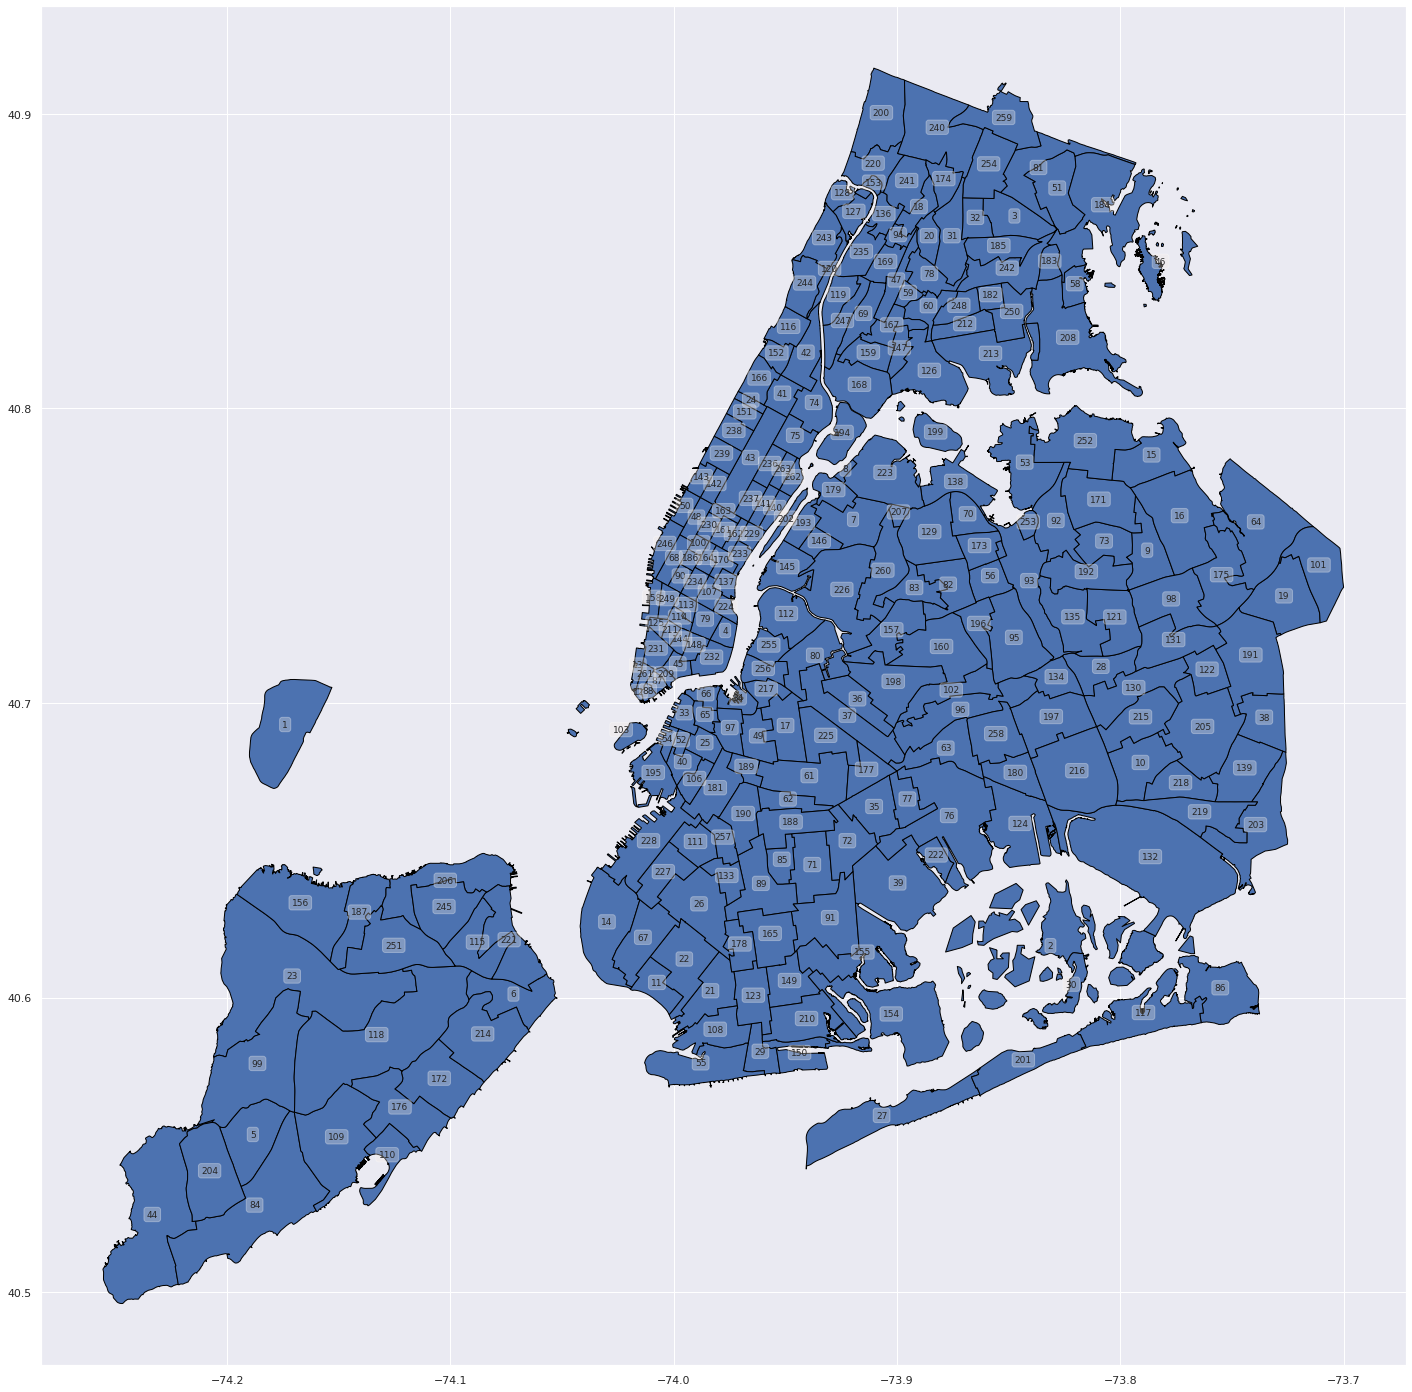

In [72]:
fig, ax = plt.subplots(figsize=(25, 25))
zones.plot(edgecolor='black', ax=ax)
props = dict(boxstyle='round', facecolor='linen', alpha=0.3)
for point in zones.iterrows():
    ax.text(point[1]['centroid'].x,
            point[1]['centroid'].y,
            point[0],
            horizontalalignment='center',
            fontsize=9,
            bbox=props)
plt.show()

As can be seem, there is no location ID greater than 263. Removing trips with IDs 264 and 265:

In [73]:
df = df.loc[~((df['pulocationid'] == 265) | (df['pulocationid'] == 264) | (df['dolocationid'] == 265) | (df['dolocationid'] == 264))]

Let's see high fare trips again:

In [74]:
df.loc[df['total_amount'] > 300]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
770967,2019-12-04 15:40:14,2019-12-04 15:42:59,2.000,0.230,226,260,460.800,Wednesday,Wednesday,15,15,2.750
1247744,2019-12-06 11:31:58,2019-12-06 12:00:25,2.000,2.500,226,260,486.300,Friday,Friday,11,12,28.450
1460116,2019-12-07 03:36:09,2019-12-07 03:57:59,1.000,6.000,188,87,325.300,Saturday,Saturday,3,3,21.833
1800836,2019-12-08 13:52:34,2019-12-08 13:55:01,2.000,0.000,61,61,565.300,Sunday,Sunday,13,13,2.450
2051190,2019-12-09 17:12:10,2019-12-09 17:14:19,2.000,0.000,193,193,300.300,Monday,Monday,17,17,2.150
2395481,2019-12-11 02:26:34,2019-12-11 02:35:18,1.000,1.500,48,107,303.950,Wednesday,Wednesday,2,2,8.733
2417660,2019-12-11 07:14:10,2019-12-11 07:26:57,1.000,3.600,132,216,330.300,Wednesday,Wednesday,7,7,12.783
2522313,2019-12-11 15:57:35,2019-12-11 16:01:07,1.000,0.900,48,48,720.300,Wednesday,Wednesday,15,16,3.533
2666879,2019-12-12 03:08:12,2019-12-12 03:25:04,2.000,4.800,230,166,312.850,Thursday,Thursday,3,3,16.867
2789359,2019-12-12 15:34:41,2019-12-12 16:11:40,1.000,8.500,223,239,300.420,Thursday,Thursday,15,16,36.983


OK, trips with high tips or long ones. But there are still some strange situations like zero distance trips.

## Removing zero miles trips and around the world trips

In [75]:
df['trip_distance'].describe()

count   6470924.000
mean          2.968
std           8.412
min         -23.010
25%           1.000
50%           1.640
75%           3.020
max       19130.180
Name: trip_distance, dtype: float64

In [76]:
df[df['trip_distance'] < 0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
80464,2019-12-01 13:21:06,2019-12-01 13:24:41,1.000,-2.290,124,216,26.120,Sunday,Sunday,13,13,3.583
1184277,2019-12-06 06:25:21,2019-12-06 06:46:11,1.000,-9.320,209,14,31.910,Friday,Friday,6,6,20.833
1223714,2019-12-06 09:05:30,2019-12-06 09:13:40,1.000,-1.620,145,193,13.950,Friday,Friday,9,9,8.167
2162800,2019-12-10 06:56:32,2019-12-10 07:06:41,1.000,-1.760,145,193,13.950,Tuesday,Tuesday,6,7,10.150
2433500,2019-12-11 09:14:14,2019-12-11 09:28:59,1.000,-1.920,232,107,18.000,Wednesday,Wednesday,9,9,14.750
2536579,2019-12-11 17:49:21,2019-12-11 17:59:11,1.000,-1.650,193,145,13.950,Wednesday,Wednesday,17,17,9.833
2649455,2019-12-11 23:40:24,2019-12-11 23:45:46,1.000,-1.230,145,145,11.950,Wednesday,Wednesday,23,23,5.367
2659167,2019-12-12 01:04:03,2019-12-12 01:21:28,1.000,-3.700,170,145,23.960,Thursday,Thursday,1,1,17.417
2716343,2019-12-12 09:02:28,2019-12-12 09:10:46,1.000,-1.730,145,193,12.950,Thursday,Thursday,9,9,8.300
2803944,2019-12-12 16:10:24,2019-12-12 16:47:20,1.000,-4.820,164,146,26.630,Thursday,Thursday,16,16,36.933


In [77]:
df[df['trip_distance'] == 0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
393,2019-12-01 00:42:27,2019-12-01 01:09:25,1.000,0.000,56,205,31.000,Sunday,Sunday,0,1,26.967
1465,2019-12-01 00:04:19,2019-12-01 00:18:21,1.000,0.000,130,92,23.000,Sunday,Sunday,0,0,14.033
1550,2019-12-01 00:58:25,2019-12-01 01:26:30,1.000,0.000,42,10,46.120,Sunday,Sunday,0,1,28.083
2026,2019-12-01 00:37:26,2019-12-01 00:42:44,2.000,0.000,230,230,0.000,Sunday,Sunday,0,0,5.300
5788,2019-12-01 00:13:48,2019-12-01 00:57:52,1.000,0.000,230,89,33.000,Sunday,Sunday,0,0,44.067
...,...,...,...,...,...,...,...,...,...,...,...,...
6840779,2019-12-31 23:40:30,2019-12-31 23:56:37,1.000,0.000,97,121,31.000,Tuesday,Tuesday,23,23,16.117
6841085,2019-12-31 23:35:44,2019-12-31 23:59:09,1.000,0.000,191,216,25.000,Tuesday,Tuesday,23,23,23.417
6842720,2019-12-31 23:08:36,2019-12-31 23:50:46,1.000,0.000,68,218,41.000,Tuesday,Tuesday,23,23,42.167
6843974,2019-12-31 23:56:16,2020-01-01 00:02:49,1.000,0.000,113,107,11.300,Wednesday,Tuesday,23,0,6.550


I thought that 0 distance trips might be those that started and ended at the same location. However, that is not the case. I will drop them too.

Removing negative distances and zero distances:

In [78]:
df = df[df['trip_distance'] > 0]

In [79]:
df['trip_distance'].describe()

count   6451078.000
mean          2.977
std           8.423
min           0.010
25%           1.000
50%           1.640
75%           3.040
max       19130.180
Name: trip_distance, dtype: float64

In [80]:
df[df['trip_distance'] > 1000]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
704581,2019-12-04 10:20:13,2019-12-04 10:24:43,1.000,19130.180,224,224,11.000,Wednesday,Wednesday,10,10,4.500


Removing the super long trip:

In [81]:
df = df[df['trip_distance'] < 1000]

In [82]:
df['trip_distance'].describe()

count   6451077.000
mean          2.974
std           3.773
min           0.010
25%           1.000
50%           1.640
75%           3.040
max         300.800
Name: trip_distance, dtype: float64

In [83]:
df[df['trip_distance'] > 100]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
6394756,2019-12-29 12:29:25,2019-12-29 12:34:03,1.000,300.800,231,125,8.800,Sunday,Sunday,12,12,4.633


In [84]:
nyc.loc[(nyc['LocationID'] == 231) | (nyc['LocationID'] == 125)]

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
124,125,0.050,0.000,Hudson Sq,125,Manhattan,"MULTIPOLYGON (((-74.00269 40.72831, -74.00215 ..."
230,231,0.063,0.000,TriBeCa/Civic Center,231,Manhattan,"MULTIPOLYGON (((-74.00932 40.72470, -74.00864 ..."


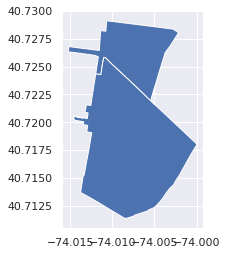

In [85]:
nyc.loc[(nyc['LocationID'] == 231) | (nyc['LocationID'] == 125)].plot()

A 4 min trip to a neighbor location with ~300 miles value. Nonsense data... removing:

In [86]:
df = df[df['trip_distance'] < 100]

In [87]:
df['trip_distance'].describe()

count   6451076.000
mean          2.974
std           3.771
min           0.010
25%           1.000
50%           1.640
75%           3.040
max          57.800
Name: trip_distance, dtype: float64

# Trips per zone

In [88]:
tx_zones = df.groupby(['pulocationid']).count()
tx_zones.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
pulocationid,,,,,,,,,,,
1,27,27,27,27,27,27,27,27,27,27,27
2,5,5,5,5,5,5,5,5,5,5,5
3,63,63,63,63,63,63,63,63,63,63,63
4,10702,10702,10702,10702,10702,10702,10702,10702,10702,10702,10702
5,31,31,31,31,31,31,31,31,31,31,31


In [89]:
nyc_taxi_map = pd.merge(nyc, tx_zones, how='left', left_on=['LocationID'], right_on=['pulocationid'])
nyc_taxi_map.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
0,1,0.116,0.001,Newark Airport,1,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ...",27.000,27.000,27.000,27.000,27.000,27.000,27.000,27.000,27.000,27.000,27.000
1,2,0.433,0.005,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000
2,3,0.084,0.000,Allerton/Pelham Gardens,3,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ...",63.000,63.000,63.000,63.000,63.000,63.000,63.000,63.000,63.000,63.000,63.000
3,4,0.044,0.000,Alphabet City,4,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...",10702.000,10702.000,10702.000,10702.000,10702.000,10702.000,10702.000,10702.000,10702.000,10702.000,10702.000
4,5,0.092,0.000,Arden Heights,5,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17348 ...",31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000


In [90]:
nyc_taxi_map.tail()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
258,259,0.127,0.000,Woodlawn/Wakefield,259,Bronx,"MULTIPOLYGON (((-73.85107 40.91037, -73.85207 ...",27.000,27.000,27.000,27.000,27.000,27.000,27.000,27.000,27.000,27.000,27.000
259,260,0.134,0.000,Woodside,260,Queens,"MULTIPOLYGON (((-73.90175 40.76078, -73.90147 ...",2967.000,2967.000,2967.000,2967.000,2967.000,2967.000,2967.000,2967.000,2967.000,2967.000,2967.000
260,261,0.027,0.000,World Trade Center,261,Manhattan,"MULTIPOLYGON (((-74.01333 40.70503, -74.01327 ...",41011.000,41011.000,41011.000,41011.000,41011.000,41011.000,41011.000,41011.000,41011.000,41011.000,41011.000
261,262,0.049,0.000,Yorkville East,262,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...",82884.000,82884.000,82884.000,82884.000,82884.000,82884.000,82884.000,82884.000,82884.000,82884.000,82884.000
262,263,0.037,0.000,Yorkville West,263,Manhattan,"MULTIPOLYGON (((-73.95219 40.77302, -73.95269 ...",122507.000,122507.000,122507.000,122507.000,122507.000,122507.000,122507.000,122507.000,122507.000,122507.000,122507.000


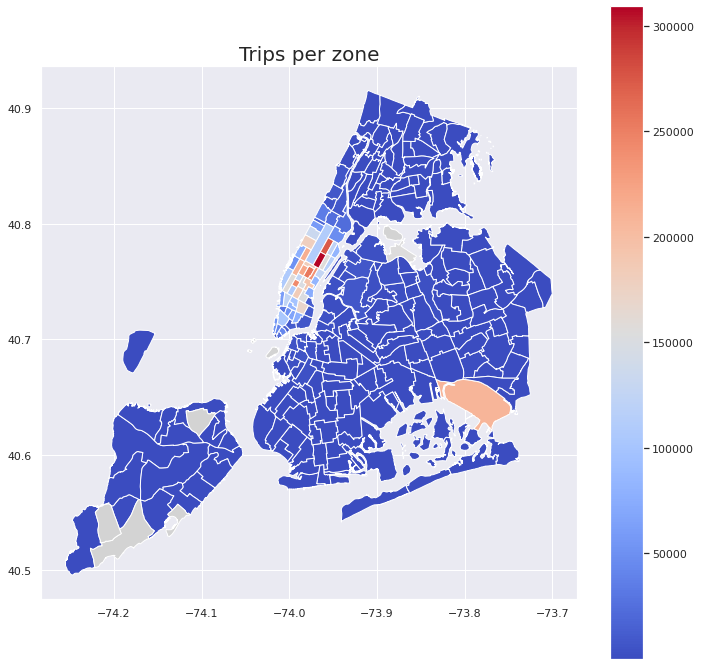

In [91]:
colors = 'coolwarm'
fig, ax = plt.subplots(figsize=(12, 12))
nyc_taxi_map.plot(column='total_amount', cmap=colors, ax=ax, missing_kwds={'color': 'lightgrey'})
ax.set_title('Trips per zone', fontsize=20)
# ax.axis('off')
vmin = nyc_taxi_map['total_amount'].min()
vmax = nyc_taxi_map['total_amount'].max()
sm = plt.cm.ScalarMappable(
    cmap=colors, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

Zones with more than 150k trips:

In [92]:
nyc_taxi_map.loc[nyc_taxi_map['total_amount'] > 150_000, ['zone', 'borough', 'LocationID']]

,zone,borough,LocationID
47,Clinton East,Manhattan,48
67,East Chelsea,Manhattan,68
78,East Village,Manhattan,79
106,Gramercy,Manhattan,107
131,JFK Airport,Queens,132
137,LaGuardia Airport,Queens,138
140,Lenox Hill West,Manhattan,141
141,Lincoln Square East,Manhattan,142
160,Midtown Center,Manhattan,161
161,Midtown East,Manhattan,162


# Correlations

## Total cost x Trip duration x Trip distance

In [93]:
df['total_amount'].corr(df['trip_distance'])

0.9283716171564744

In [94]:
df['total_amount'].corr(df['trip_duration'])

0.8509008464632719

In [95]:
df['trip_distance'].corr(df['trip_duration'])

0.7765898437526524

In [96]:
corr_matrix = df.loc[:, ['total_amount', 'trip_distance', 'trip_duration']].corr()
corr_matrix

,total_amount,trip_distance,trip_duration
total_amount,1.000,0.928,0.851
trip_distance,0.928,1.000,0.777
trip_duration,0.851,0.777,1.000


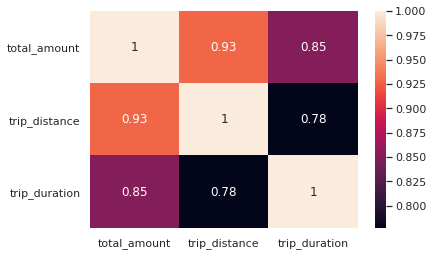

In [97]:
sns.heatmap(corr_matrix, annot=True)

As expected, there is a strong positive correlation between total fare, trip distance and trip duration.

## Correlation Weekday x Trip Duration

Trips per weekday:

In [98]:
pd.pivot_table(df, values='total_amount', index='pickup_day', aggfunc='count')

,total_amount
pickup_day,
Friday,933910
Monday,957972
Saturday,873114
Sunday,916248
Thursday,922384
Tuesday,1016070
Wednesday,831378


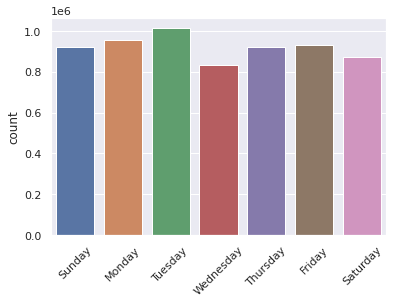

In [99]:
ax = sns.countplot(pd.Categorical(df['dropoff_day'], 
                                  categories=['Sunday', 'Monday', 'Tuesday', 
                                              'Wednesday', 'Thursday', 'Friday',
                                              'Saturday'],
                                  ordered=True))
for label in ax.get_xticklabels():
    label.set_rotation(45)

According to [seaborn docs](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot), the barplot

> Show point estimates and confidence intervals as rectangular bars.

> A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. 

> It is also important to keep in mind that a bar plot shows only the mean (or other estimator) value, but in many cases it may be more informative to show the distribution of values at each level of the categorical variables. In that case, other approaches such as a box or violin plot may be more appropriate.

Since the dataset is large, the computation can be long. Let's see the trip duration mean per weekday:

0:01:17.023872


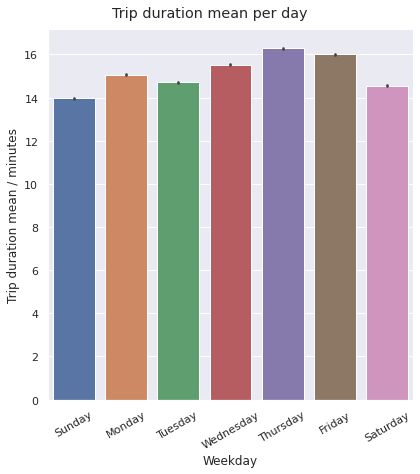

In [104]:
start = datetime.now()

ax = sns.catplot(x="pickup_day", y="trip_duration",
            kind="bar", data=df, height=6, aspect=1,
            order=['Sunday', 'Monday', 'Tuesday',
                   'Wednesday', 'Thursday', 'Friday',
                   'Saturday'])

ax.set_xticklabels(rotation=30)
ax.fig.suptitle('Trip duration mean per day', y=1.025)
ax.set_ylabels('Trip duration mean / minutes')
ax.set_xlabels('Weekday')

print(datetime.now() - start)

And now the trip duration median per weekday:

0:02:21.208602


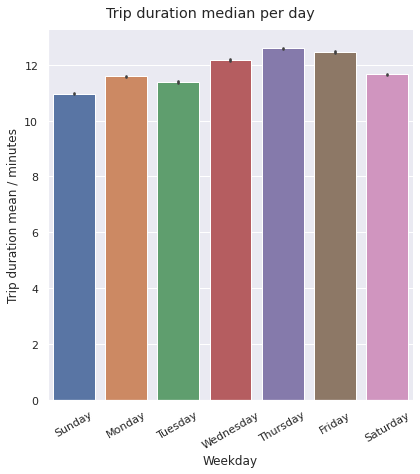

In [105]:
start = datetime.now()

ax = sns.catplot(x="pickup_day", y="trip_duration",
                 kind="bar", data=df, height=6, aspect=1,
                 order=['Sunday', 'Monday', 'Tuesday',
                        'Wednesday', 'Thursday', 'Friday',
                        'Saturday'],
                 estimator=np.median)

ax.set_xticklabels(rotation=30)
ax.fig.suptitle('Trip duration median per day', y=1.025)
ax.set_ylabels('Trip duration median / minutes')
ax.set_xlabels('Weekday')

print(datetime.now() - start)

Wednesday, Thursday and Friday have longer trips.

## Correlation Weekday x Passengers

First, let's plot the passenger count:

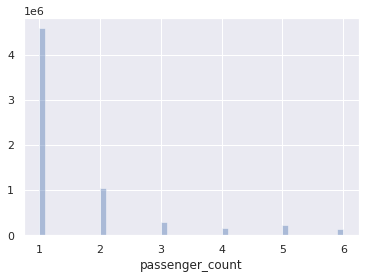

In [106]:
# without customization
sns.distplot(df['passenger_count'], kde=False)

Since seaborn usually returns Matplotlib axes, we can customize our plots:

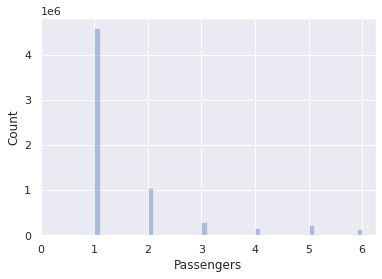

In [107]:
# customization
ax = sns.distplot(df['passenger_count'], kde=False, axlabel='Passengers')
ax.set_ylabel('Count')
ax.set_xticks([i for i in range(7)])
plt.show()

0:01:17.319289


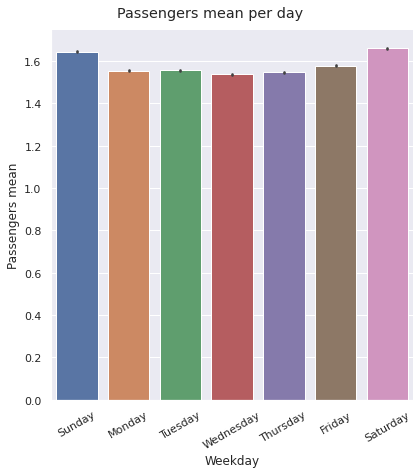

In [108]:
start = datetime.now()

ax = sns.catplot(x="pickup_day", y="passenger_count",
            kind="bar", data=df, height=6, aspect=1,
            order=['Sunday', 'Monday', 'Tuesday',
                   'Wednesday', 'Thursday', 'Friday',
                   'Saturday'])

ax.set_xticklabels(rotation=30)
ax.fig.suptitle('Passengers mean per day', y=1.025)
ax.set_ylabels('Passengers mean')
ax.set_xlabels('Weekday')

print(datetime.now() - start)

Weekends have more passengers per trip. Probably due to couples and families going out.

# Workdays vs weekends

Comparing pick up and drop off hours considering all days in the dataset:

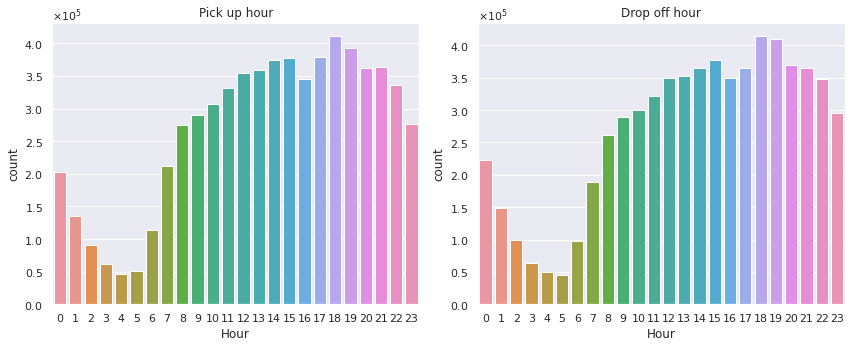

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5), tight_layout=True)

sns.countplot(x='pickup_hour', data=df, ax=ax[0])
ax[0].set_title('Pick up hour')
ax[0].set_xlabel('Hour')
ax[0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

sns.countplot(x='dropoff_hour', data=df, ax=ax[1])
ax[1].set_title('Drop off hour')
ax[1].set_xlabel('Hour')
ax[1].ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

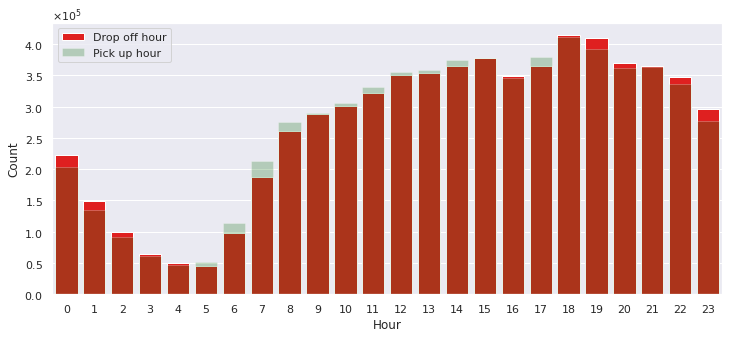

In [110]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x='dropoff_hour', data=df, color='red', label='Drop off hour')
ax = sns.countplot(x='pickup_hour', data=df, color='green', label='Pick up hour', alpha=0.25)
ax.set_xlabel('Hour')
ax.set_ylabel('Count')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)
ax.legend(loc='best')
plt.show()

In [111]:
bins = [i for i in range(25)]
label = ['Pick up hour', 'Drop off hour']

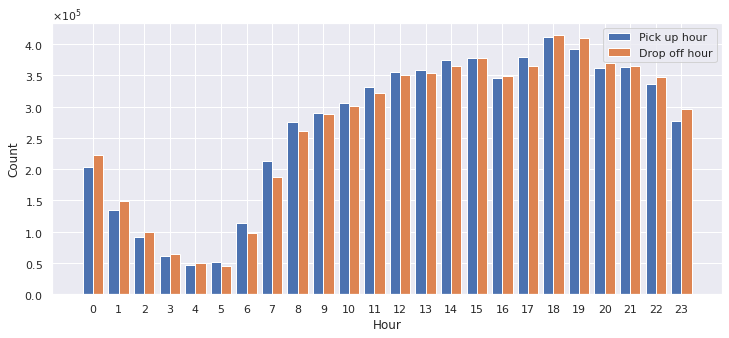

In [112]:
fig, ax = plt.subplots(figsize=(12,5))
ax.hist([df['pickup_hour'], df['dropoff_hour']], bins=bins, align='left', label=label)
ax.set_xlabel('Hour')
ax.set_ylabel('Count')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)
ax.set_xticks(bins[:-1])
ax.legend(loc='best')
plt.show()

Splitting workdays and weekends and creating new data frames for each set:

In [113]:
workdays = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday')
weekend = ('Saturday', 'Sunday')

In [114]:
workdays_df = df.loc[df['pickup_day'].isin(workdays)]

In [115]:
weekend_df = df.loc[df['pickup_day'].isin(weekend)]

Comparing workdays and weekends:

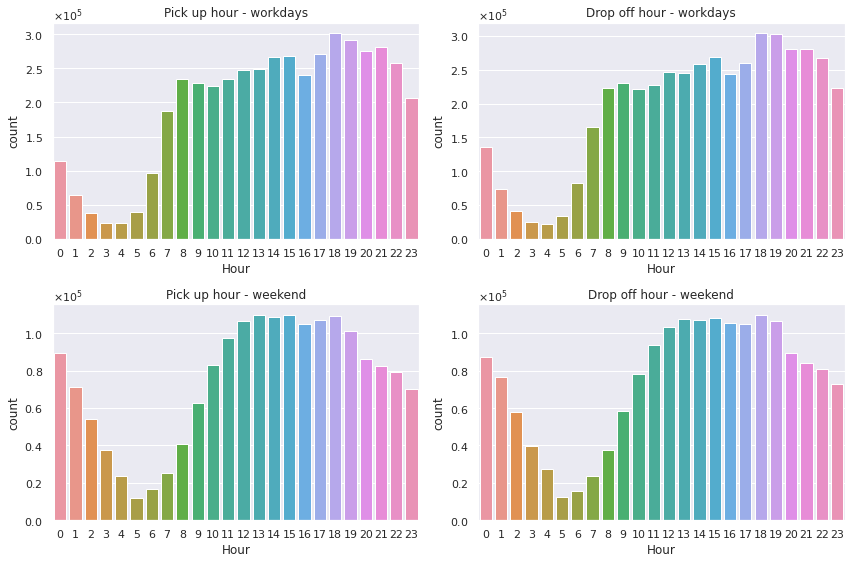

In [117]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8), tight_layout=True)

sns.countplot(x='pickup_hour', data=workdays_df, ax=ax[0][0])
ax[0][0].set_title('Pick up hour - workdays')
ax[0][0].set_xlabel('Hour')
ax[0][0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

sns.countplot(x='dropoff_hour', data=workdays_df, ax=ax[0][1])
ax[0][1].set_title('Drop off hour - workdays')
ax[0][1].set_xlabel('Hour')
ax[0][1].ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

sns.countplot(x='pickup_hour', data=weekend_df, ax=ax[1][0])
ax[1][0].set_title('Pick up hour - weekend')
ax[1][0].set_xlabel('Hour')
ax[1][0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

sns.countplot(x='dropoff_hour', data=weekend_df, ax=ax[1][1])
ax[1][1].set_title('Drop off hour - weekend')
ax[1][1].set_xlabel('Hour')
ax[1][1].ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

As expected, in weekends there are less trips than in workdays and the trip count begins to rise at the end of the morning being almost constant between 12 and 19 h. Compared with workdays, there are proportionally more trips in the wee hours (0 to 4 h).

In [118]:
workdays_df['total_amount'].describe()

count   4661714.000
mean         19.452
std          13.736
min           0.000
25%          11.760
50%          15.300
75%          21.300
max         720.300
Name: total_amount, dtype: float64

In [119]:
weekend_df['total_amount'].describe()

count   1789362.000
mean         18.851
std          13.401
min           0.000
25%          11.160
50%          14.750
75%          20.760
max         421.280
Name: total_amount, dtype: float64

In [120]:
workdays_df['trip_distance'].describe()

count   4661714.000
mean          2.939
std           3.752
min           0.010
25%           0.990
50%           1.600
75%           2.990
max          57.800
Name: trip_distance, dtype: float64

In [121]:
weekend_df['trip_distance'].describe()

count   1789362.000
mean          3.064
std           3.819
min           0.010
25%           1.030
50%           1.700
75%           3.200
max          54.210
Name: trip_distance, dtype: float64

In [122]:
workdays_df['trip_duration'].describe()

count   4661714.000
mean         15.497
std          12.473
min           2.033
25%           7.200
50%          12.017
75%          19.650
max         109.933
Name: trip_duration, dtype: float64

In [123]:
weekend_df['trip_duration'].describe()

count   1789362.000
mean         14.250
std          10.644
min           2.033
25%           6.750
50%          11.300
75%          18.533
max         109.817
Name: trip_duration, dtype: float64

Comparing fares, distance and duration:

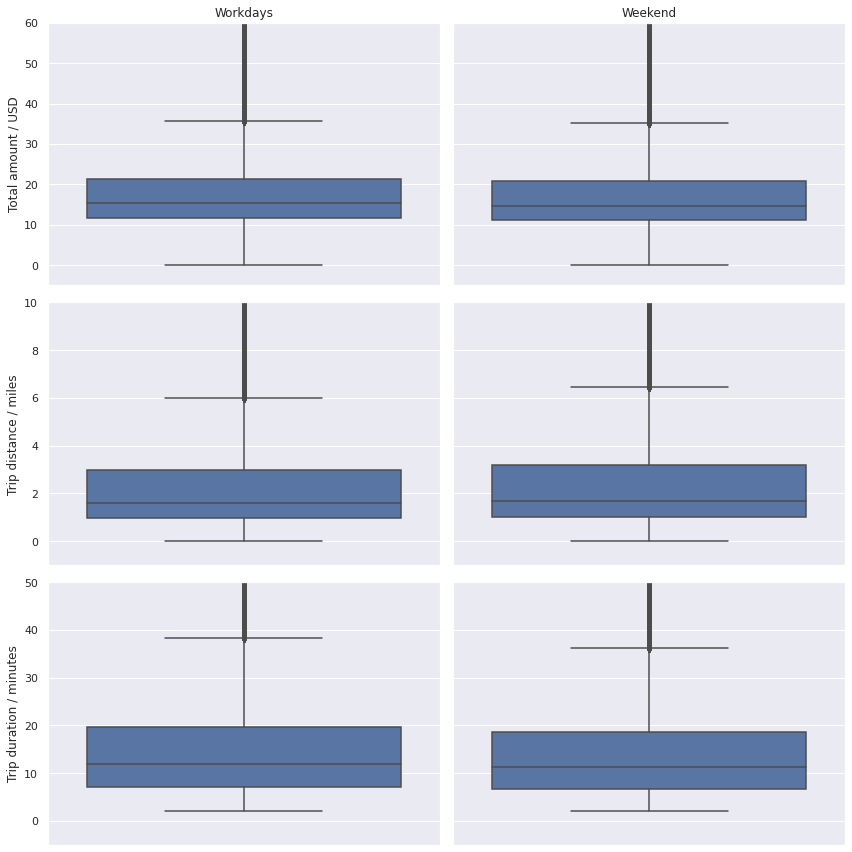

In [124]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,12), tight_layout=True, sharey='row')

sns.boxplot(x=workdays_df['total_amount'], ax=ax[0][0], orient='vert')
sns.boxplot(x=weekend_df['total_amount'], ax=ax[0][1], orient='vert')

sns.boxplot(x=workdays_df['trip_distance'], ax=ax[1][0], orient='vert')
sns.boxplot(x=weekend_df['trip_distance'], ax=ax[1][1], orient='vert')

sns.boxplot(x=workdays_df['trip_duration'], ax=ax[2][0], orient='vert')
sns.boxplot(x=weekend_df['trip_duration'], ax=ax[2][1], orient='vert')

for i in range(3):
    for j in range(2):
        if j == 0:
            ax[0][j].set_title('Workdays')
            ax[0][j].set_ylabel('Total amount / USD')
            ax[0][j].set_ylim(-5, 60)
            ax[1][j].set_ylabel('Trip distance / miles')
            ax[1][j].set_ylim(-1, 10)
            ax[2][j].set_ylabel('Trip duration / minutes')
            ax[2][j].set_ylim(-5, 50)
        else:
            ax[0][j].set_title('Weekend')
            ax[0][j].set_ylabel('')
            ax[1][j].set_ylabel('')
            ax[2][j].set_ylabel('')

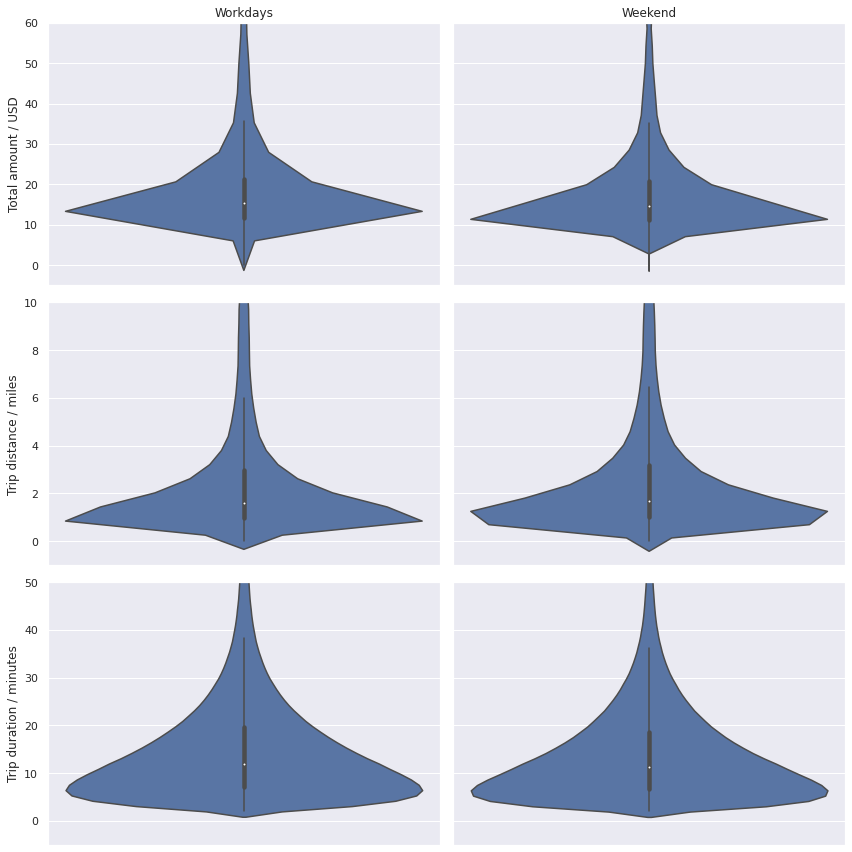

In [125]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,12), tight_layout=True, sharey='row')

sns.violinplot(x=workdays_df['total_amount'], ax=ax[0][0], orient='vert')
sns.violinplot(x=weekend_df['total_amount'], ax=ax[0][1], orient='vert')

sns.violinplot(x=workdays_df['trip_distance'], ax=ax[1][0], orient='vert')
sns.violinplot(x=weekend_df['trip_distance'], ax=ax[1][1], orient='vert')

sns.violinplot(x=workdays_df['trip_duration'], ax=ax[2][0], orient='vert')
sns.violinplot(x=weekend_df['trip_duration'], ax=ax[2][1], orient='vert')

for i in range(3):
    for j in range(2):
        if j == 0:
            ax[0][j].set_title('Workdays')
            ax[0][j].set_ylabel('Total amount / USD')
            ax[0][j].set_ylim(-5, 60)
            ax[1][j].set_ylabel('Trip distance / miles')
            ax[1][j].set_ylim(-1, 10)
            ax[2][j].set_ylabel('Trip duration / minutes')
            ax[2][j].set_ylim(-5, 50)
        else:
            ax[0][j].set_title('Weekend')
            ax[0][j].set_ylabel('')
            ax[1][j].set_ylabel('')
            ax[2][j].set_ylabel('')

There is not much difference between workdays and weekend with respect to trips fares, duration and distance.

Comparing trips in workdays normal, rush and overnight hours (https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page):

In [126]:
overnight = [_ for _ in range(6)] + [_ for _ in range(20, 24)]
overnight

[0, 1, 2, 3, 4, 5, 20, 21, 22, 23]

In [127]:
normal = [_ for _ in range(6, 16)]
normal

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [128]:
rush = [_ for _ in range(16, 20)]
rush

[16, 17, 18, 19]

In [129]:
workdays_normal_df = workdays_df.loc[df['pickup_hour'].isin(normal), 
                                     ['total_amount', 'trip_distance', 'trip_duration']]
workdays_normal_df.describe()

,total_amount,trip_distance,trip_duration
count,2236123.000,2236123.000,2236123.000
mean,18.903,2.782,15.851
std,13.948,3.720,12.980
min,0.000,0.010,2.033
25%,11.160,0.910,7.250
50%,14.690,1.500,12.133
75%,20.300,2.680,19.950
max,720.300,53.300,109.933


In [130]:
workdays_rush_df = workdays_df.loc[df['pickup_hour'].isin(rush), 
                                   ['total_amount', 'trip_distance', 'trip_duration']]
workdays_rush_df.describe()

,total_amount,trip_distance,trip_duration
count,1105050.000,1105050.000,1105050.000
mean,20.234,2.760,16.878
std,14.077,3.672,14.340
min,0.000,0.010,2.033
25%,12.350,0.940,7.550
50%,15.950,1.520,12.700
75%,21.800,2.700,20.950
max,490.800,57.800,109.917


In [131]:
workdays_overnight_df = workdays_df.loc[df['pickup_hour'].isin(overnight), 
                                        ['total_amount', 'trip_distance', 'trip_duration']]
workdays_overnight_df.describe()

,total_amount,trip_distance,trip_duration
count,1320541.000,1320541.000,1320541.000
mean,19.727,3.354,13.743
std,13.028,3.839,9.322
min,0.000,0.010,2.033
25%,11.800,1.130,6.867
50%,15.360,1.980,11.300
75%,22.300,3.800,18.200
max,635.960,53.430,109.083


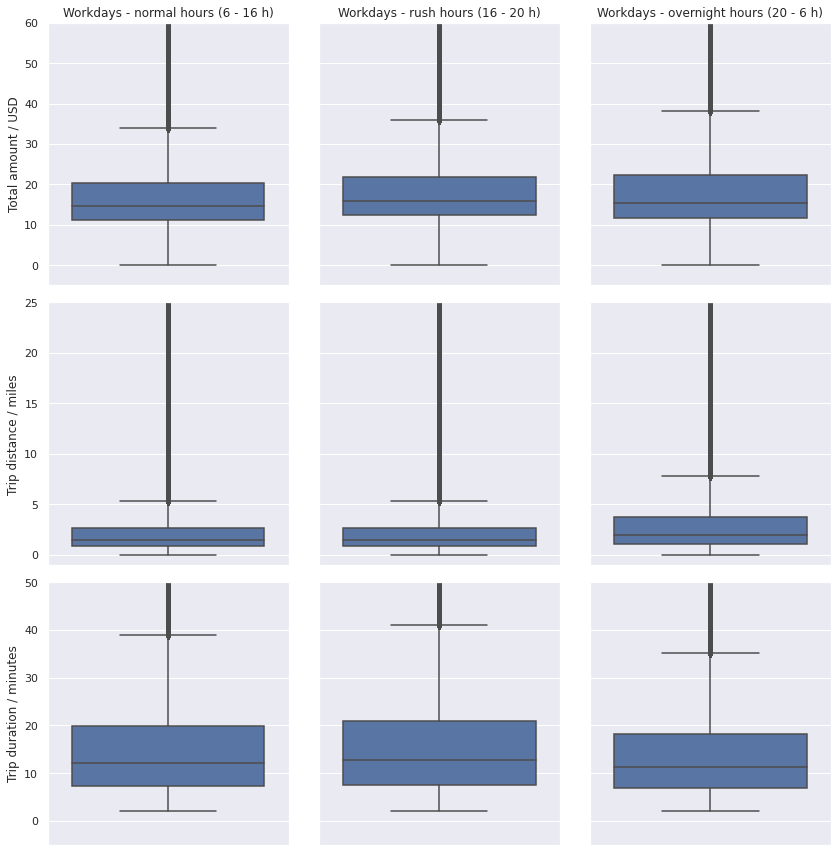

In [132]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,12), tight_layout=True, sharey='row')

sns.boxplot(x=workdays_normal_df['total_amount'], ax=ax[0][0], orient='vert')
sns.boxplot(x=workdays_rush_df['total_amount'], ax=ax[0][1], orient='vert')
sns.boxplot(x=workdays_overnight_df['total_amount'], ax=ax[0][2], orient='vert')

sns.boxplot(x=workdays_normal_df['trip_distance'], ax=ax[1][0], orient='vert')
sns.boxplot(x=workdays_rush_df['trip_distance'], ax=ax[1][1], orient='vert')
sns.boxplot(x=workdays_overnight_df['trip_distance'], ax=ax[1][2], orient='vert')

sns.boxplot(x=workdays_normal_df['trip_duration'], ax=ax[2][0], orient='vert')
sns.boxplot(x=workdays_rush_df['trip_duration'], ax=ax[2][1], orient='vert')
sns.boxplot(x=workdays_overnight_df['trip_duration'], ax=ax[2][2], orient='vert')

for i in range(3):
    for j in range(3):
        if j == 0:
            ax[0][j].set_title('Workdays - normal hours (6 - 16 h)')
            ax[0][j].set_ylabel('Total amount / USD')
            ax[0][j].set_ylim(-5, 60)
            ax[1][j].set_ylabel('Trip distance / miles')
            ax[1][j].set_ylim(-1, 25)
            ax[2][j].set_ylabel('Trip duration / minutes')
            ax[2][j].set_ylim(-5, 50)
        elif j == 1:
            ax[0][j].set_title('Workdays - rush hours (16 - 20 h)')
            ax[0][j].set_ylabel('')
            ax[1][j].set_ylabel('')
            ax[2][j].set_ylabel('')
        else:
            ax[0][j].set_title('Workdays - overnight hours (20 - 6 h)')
            ax[0][j].set_ylabel('')
            ax[1][j].set_ylabel('')
            ax[2][j].set_ylabel('')

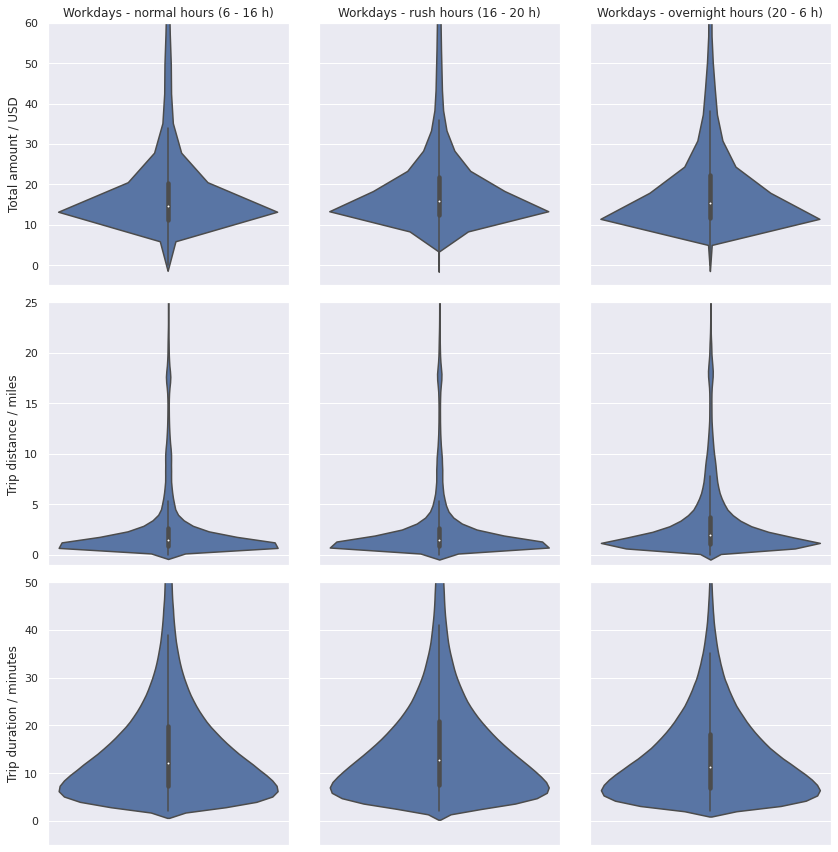

In [133]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,12), tight_layout=True, sharey='row')

sns.violinplot(x=workdays_normal_df['total_amount'], ax=ax[0][0], orient='vert')
sns.violinplot(x=workdays_rush_df['total_amount'], ax=ax[0][1], orient='vert')
sns.violinplot(x=workdays_overnight_df['total_amount'], ax=ax[0][2], orient='vert')

sns.violinplot(x=workdays_normal_df['trip_distance'], ax=ax[1][0], orient='vert')
sns.violinplot(x=workdays_rush_df['trip_distance'], ax=ax[1][1], orient='vert')
sns.violinplot(x=workdays_overnight_df['trip_distance'], ax=ax[1][2], orient='vert')

sns.violinplot(x=workdays_normal_df['trip_duration'], ax=ax[2][0], orient='vert')
sns.violinplot(x=workdays_rush_df['trip_duration'], ax=ax[2][1], orient='vert')
sns.violinplot(x=workdays_overnight_df['trip_duration'], ax=ax[2][2], orient='vert')

for i in range(3):
    for j in range(3):
        if j == 0:
            ax[0][j].set_title('Workdays - normal hours (6 - 16 h)')
            ax[0][j].set_ylabel('Total amount / USD')
            ax[0][j].set_ylim(-5, 60)
            ax[1][j].set_ylabel('Trip distance / miles')
            ax[1][j].set_ylim(-1, 25)
            ax[2][j].set_ylabel('Trip duration / minutes')
            ax[2][j].set_ylim(-5, 50)
        elif j == 1:
            ax[0][j].set_title('Workdays - rush hours (16 - 20 h)')
            ax[0][j].set_ylabel('')
            ax[1][j].set_ylabel('')
            ax[2][j].set_ylabel('')
        else:
            ax[0][j].set_title('Workdays - overnight hours (20 - 6 h)')
            ax[0][j].set_ylabel('')
            ax[1][j].set_ylabel('')
            ax[2][j].set_ylabel('')

It seems that rush hours and overnight trips are slightly more expensive; rush hours trips have greater duration; and overnight trips have greater distance.

However, there is not a great difference between the time categories. Maybe because all the city is being considered. Let's limit our analysis to Manhattan at locations with at least 100k trips:

In [134]:
manhattan_100k = set(nyc_taxi_map.loc[(nyc_taxi_map['borough'] == 'Manhattan') & 
                                      (nyc_taxi_map['total_amount'] >= 100_000), 
                                      'LocationID'])

In [135]:
manhattan_workdays_normal_df = df.loc[(df['pulocationid'].isin(manhattan_100k)) & 
                                      (df['dolocationid'].isin(manhattan_100k)) & 
                                      df['pickup_hour'].isin(normal) & 
                                      (df['pickup_day'].isin(workdays)), 
                                      ['total_amount', 'trip_distance', 'trip_duration']]
manhattan_workdays_normal_df.describe()

,total_amount,trip_distance,trip_duration
count,1255108.000,1255108.000,1255108.000
mean,14.581,1.456,12.522
std,5.437,0.969,7.894
min,0.000,0.010,2.033
25%,10.800,0.800,6.650
50%,13.500,1.210,10.667
75%,17.160,1.820,16.467
max,720.300,42.130,109.933


In [136]:
manhattan_workdays_rush_df = df.loc[(df['pulocationid'].isin(manhattan_100k)) & 
                                    (df['dolocationid'].isin(manhattan_100k)) & 
                                    df['pickup_hour'].isin(rush) & 
                                    (df['pickup_day'].isin(workdays)), 
                                    ['total_amount', 'trip_distance', 'trip_duration']]
manhattan_workdays_rush_df.describe()

,total_amount,trip_distance,trip_duration
count,597068.000,597068.000,597068.000
mean,16.032,1.485,13.223
std,5.682,0.971,8.382
min,0.000,0.010,2.033
25%,11.850,0.810,6.950
50%,14.760,1.260,11.300
75%,18.800,1.890,17.467
max,324.300,40.970,108.133


In [137]:
manhattan_workdays_overnight_df = df.loc[(df['pulocationid'].isin(manhattan_100k)) & 
                                         (df['dolocationid'].isin(manhattan_100k)) & 
                                         df['pickup_hour'].isin(overnight) & 
                                         (df['pickup_day'].isin(workdays)), 
                                         ['total_amount', 'trip_distance', 'trip_duration']]
manhattan_workdays_overnight_df.describe()

,total_amount,trip_distance,trip_duration
count,609326.000,609326.000,609326.000
mean,14.588,1.706,10.437
std,5.030,1.091,6.207
min,0.000,0.010,2.033
25%,11.160,0.940,5.850
50%,13.560,1.440,9.083
75%,16.800,2.200,13.533
max,419.240,38.310,107.467


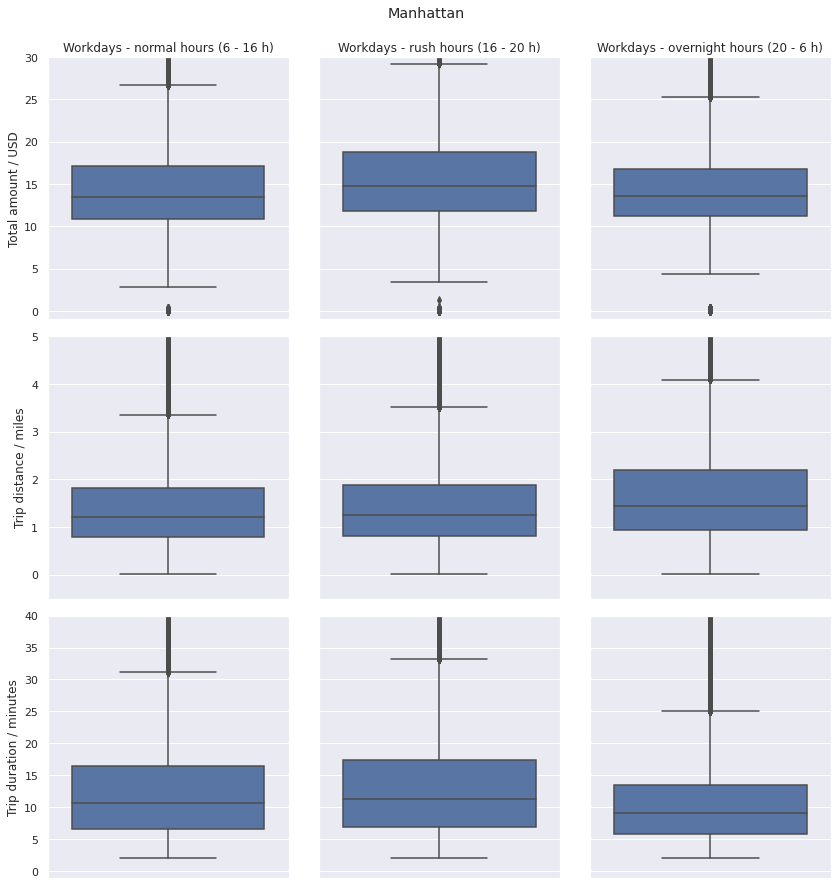

In [138]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,12), tight_layout=True, sharey='row')

sns.boxplot(x=manhattan_workdays_normal_df['total_amount'], ax=ax[0][0], orient='vert')
sns.boxplot(x=manhattan_workdays_rush_df['total_amount'], ax=ax[0][1], orient='vert')
sns.boxplot(x=manhattan_workdays_overnight_df['total_amount'], ax=ax[0][2], orient='vert')

sns.boxplot(x=manhattan_workdays_normal_df['trip_distance'], ax=ax[1][0], orient='vert')
sns.boxplot(x=manhattan_workdays_rush_df['trip_distance'], ax=ax[1][1], orient='vert')
sns.boxplot(x=manhattan_workdays_overnight_df['trip_distance'], ax=ax[1][2], orient='vert')

sns.boxplot(x=manhattan_workdays_normal_df['trip_duration'], ax=ax[2][0], orient='vert')
sns.boxplot(x=manhattan_workdays_rush_df['trip_duration'], ax=ax[2][1], orient='vert')
sns.boxplot(x=manhattan_workdays_overnight_df['trip_duration'], ax=ax[2][2], orient='vert')

for i in range(3):
    for j in range(3):
        if j == 0:
            ax[0][j].set_title('Workdays - normal hours (6 - 16 h)')
            ax[0][j].set_ylabel('Total amount / USD')
            ax[0][j].set_ylim(-1, 30)
            ax[1][j].set_ylabel('Trip distance / miles')
            ax[1][j].set_ylim(-0.5, 5)
            ax[2][j].set_ylabel('Trip duration / minutes')
            ax[2][j].set_ylim(-1, 40)
        elif j == 1:
            ax[0][j].set_title('Workdays - rush hours (16 - 20 h)')
            ax[0][j].set_ylabel('')
            ax[1][j].set_ylabel('')
            ax[2][j].set_ylabel('')
        else:
            ax[0][j].set_title('Workdays - overnight hours (20 - 6 h)')
            ax[0][j].set_ylabel('')
            ax[1][j].set_ylabel('')
            ax[2][j].set_ylabel('')
fig.suptitle('Manhattan', y=1.025)
plt.show()

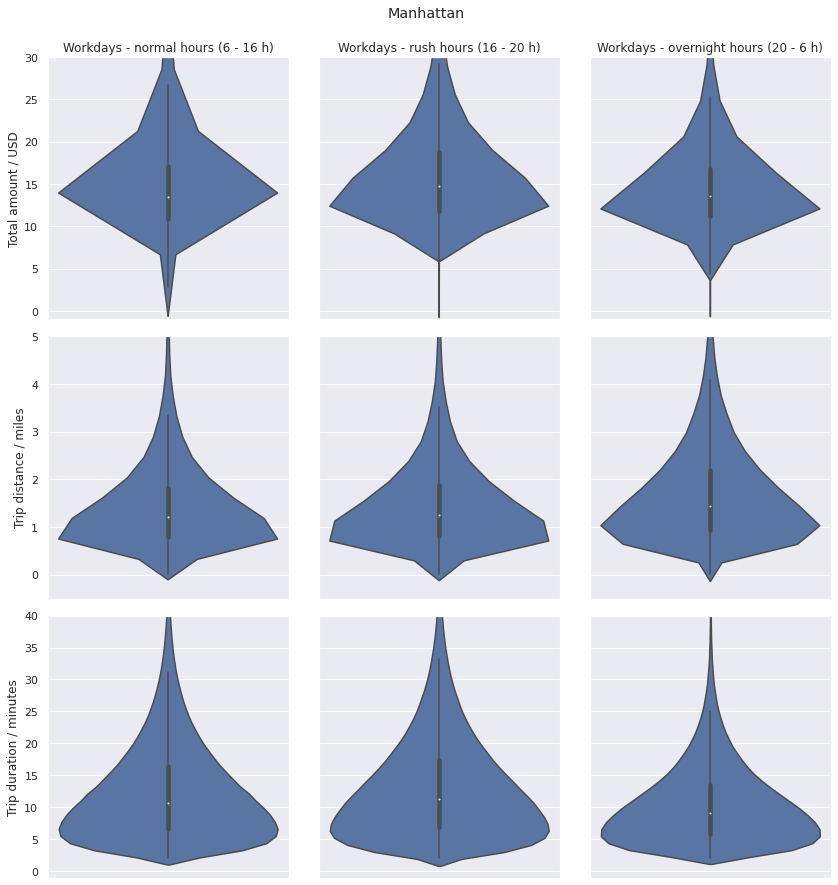

In [139]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,12), tight_layout=True, sharey='row')

sns.violinplot(x=manhattan_workdays_normal_df['total_amount'], ax=ax[0][0], orient='vert')
sns.violinplot(x=manhattan_workdays_rush_df['total_amount'], ax=ax[0][1], orient='vert')
sns.violinplot(x=manhattan_workdays_overnight_df['total_amount'], ax=ax[0][2], orient='vert')

sns.violinplot(x=manhattan_workdays_normal_df['trip_distance'], ax=ax[1][0], orient='vert')
sns.violinplot(x=manhattan_workdays_rush_df['trip_distance'], ax=ax[1][1], orient='vert')
sns.violinplot(x=manhattan_workdays_overnight_df['trip_distance'], ax=ax[1][2], orient='vert')

sns.violinplot(x=manhattan_workdays_normal_df['trip_duration'], ax=ax[2][0], orient='vert')
sns.violinplot(x=manhattan_workdays_rush_df['trip_duration'], ax=ax[2][1], orient='vert')
sns.violinplot(x=manhattan_workdays_overnight_df['trip_duration'], ax=ax[2][2], orient='vert')

for i in range(3):
    for j in range(3):
        if j == 0:
            ax[0][j].set_title('Workdays - normal hours (6 - 16 h)')
            ax[0][j].set_ylabel('Total amount / USD')
            ax[0][j].set_ylim(-1, 30)
            ax[1][j].set_ylabel('Trip distance / miles')
            ax[1][j].set_ylim(-0.5, 5)
            ax[2][j].set_ylabel('Trip duration / minutes')
            ax[2][j].set_ylim(-1, 40)
        elif j == 1:
            ax[0][j].set_title('Workdays - rush hours (16 - 20 h)')
            ax[0][j].set_ylabel('')
            ax[1][j].set_ylabel('')
            ax[2][j].set_ylabel('')
        else:
            ax[0][j].set_title('Workdays - overnight hours (20 - 6 h)')
            ax[0][j].set_ylabel('')
            ax[1][j].set_ylabel('')
            ax[2][j].set_ylabel('')
fig.suptitle('Manhattan', y=1.025)
plt.show()

Similar to the rest of the city.

# Comparing fares, trip duration and trip distance

## Considering all trips in the dataframe

In [140]:
df['total_amount'].describe()

count   6451076.000
mean         19.285
std          13.647
min           0.000
25%          11.600
50%          14.800
75%          21.000
max         720.300
Name: total_amount, dtype: float64

In [141]:
df['trip_duration'].describe()

count   6451076.000
mean         15.151
std          12.006
min           2.033
25%           7.067
50%          11.817
75%          19.333
max         109.933
Name: trip_duration, dtype: float64

In [142]:
df['trip_distance'].describe()

count   6451076.000
mean          2.974
std           3.771
min           0.010
25%           1.000
50%           1.640
75%           3.040
max          57.800
Name: trip_distance, dtype: float64

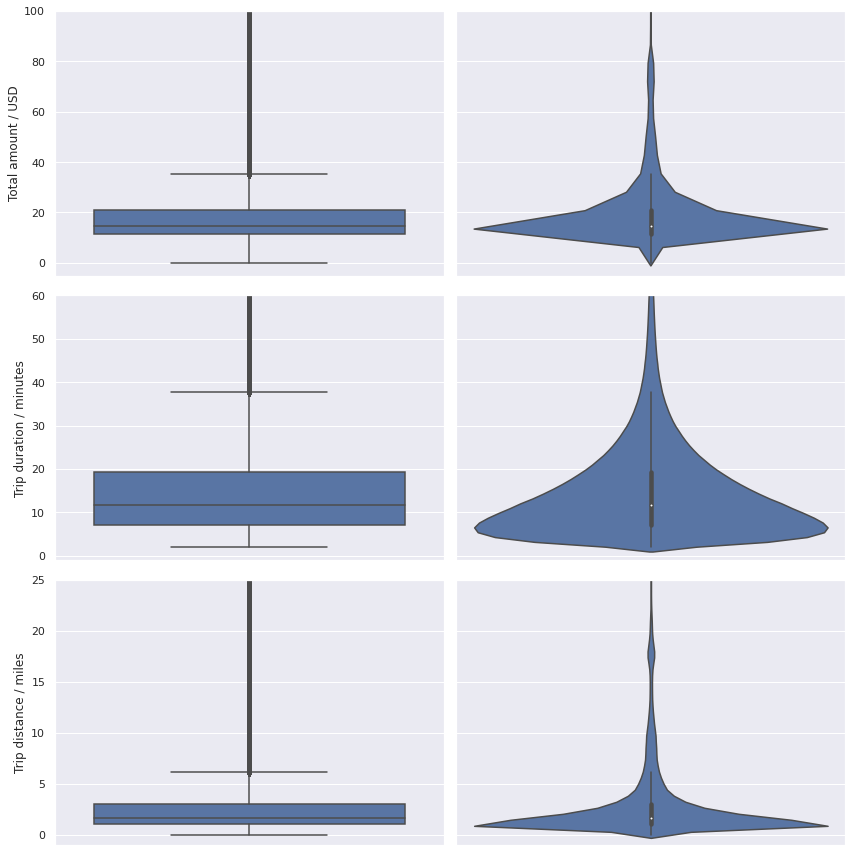

In [146]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 12), tight_layout=True, sharey='row')

sns.boxplot(x=df['total_amount'], ax=ax[0][0], orient='vert')
sns.violinplot(x=df['total_amount'], ax=ax[0][1], orient='vert')

sns.boxplot(x=df['trip_duration'], ax=ax[1][0], orient='vert')
sns.violinplot(x=df['trip_duration'], ax=ax[1][1], orient='vert')

sns.boxplot(x=df['trip_distance'], ax=ax[2][0], orient='vert')
sns.violinplot(x=df['trip_distance'], ax=ax[2][1], orient='vert')

for i in range(3):
    for j in range(2):
        if j == 0:            
            ax[0][j].set_ylabel('Total amount / USD')
            ax[0][j].set_ylim(-5, 100)
            ax[1][j].set_ylabel('Trip duration / minutes')
            ax[1][j].set_ylim(-1, 60)            
            ax[2][j].set_ylabel('Trip distance / miles')
            ax[2][j].set_ylim(-1, 25)
        else:            
            ax[0][j].set_ylabel('')
            ax[1][j].set_ylabel('')
            ax[2][j].set_ylabel('')

The trip total cost and trip distance violin plots are similar, with a slightly second peak towards greater values. It makes sense since lengthier trips tend to be more expensive.

## Same location ID trips

Taking a look at fares:

In [147]:
df.loc[df['pulocationid'] == df['dolocationid'], ['total_amount']].describe()

,total_amount
count,309948.000
mean,10.611
std,6.050
min,0.000
25%,8.300
50%,9.790
75%,11.160
max,720.300


Comparing boxplots:

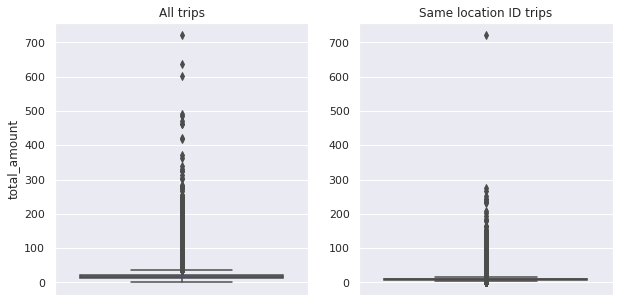

In [148]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(x=df['total_amount'], ax=ax[0], orient='vert')
sns.boxplot(x=df.loc[df['pulocationid'] == df['dolocationid'], [
            'total_amount']], ax=ax[1], orient='vert')
ax[0].set_title('All trips')
ax[1].set_title('Same location ID trips')
plt.show()

The interquartile range (IQR) shrinks as expected.

Let's compare trips with total amounts less than 50 USD:

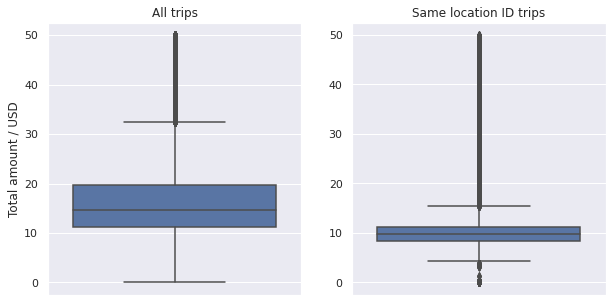

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(x=df.loc[df['total_amount'] < 50, ['total_amount']], ax=ax[0], orient='vert')
sns.boxplot(x=df.loc[(df['pulocationid'] == df['dolocationid']) & (df['total_amount'] < 50), ['total_amount']], ax=ax[1], orient='vert')
ax[0].set_ylabel('Total amount / USD')
ax[0].set_title('All trips')
ax[1].set_title('Same location ID trips')
plt.show()

Take a look at trip distances and trip duration:

In [150]:
df.loc[df['pulocationid'] == df['dolocationid'], ['trip_distance']].describe()

,trip_distance
count,309948.000
mean,0.799
std,1.160
min,0.010
25%,0.460
50%,0.600
75%,0.800
max,54.210


In [151]:
df.loc[df['pulocationid'] == df['dolocationid'], ['trip_duration']].describe()

,trip_duration
count,309948.000
mean,6.245
std,5.788
min,2.033
25%,3.333
50%,4.667
75%,6.917
max,109.267


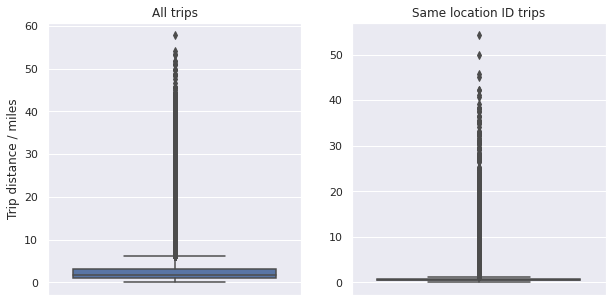

In [152]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(x=df['trip_distance'], ax=ax[0], orient='vert')
sns.boxplot(x=df.loc[df['pulocationid'] == df['dolocationid'], [
            'trip_distance']], ax=ax[1], orient='vert')
ax[0].set_ylabel('Trip distance / miles')
ax[0].set_title('All trips')
ax[1].set_title('Same location ID trips')
plt.show()

Only trips with less than 10 miles:

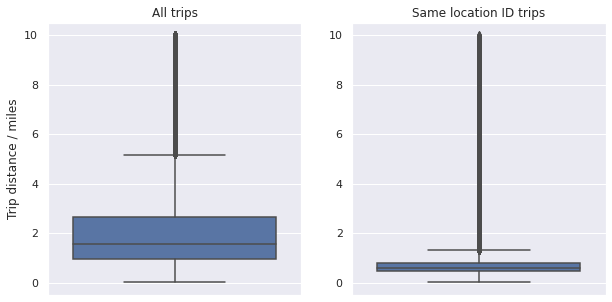

In [153]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(x=df.loc[df['trip_distance'] < 10, ['trip_distance']], ax=ax[0], orient='vert')
sns.boxplot(x=df.loc[(df['pulocationid'] == df['dolocationid']) & (df['trip_distance'] < 10), ['trip_distance']], ax=ax[1], orient='vert')
ax[0].set_ylabel('Trip distance / miles')
ax[0].set_title('All trips')
ax[1].set_title('Same location ID trips')
plt.show()

The interquartile range (IQR) shrinks as expected.

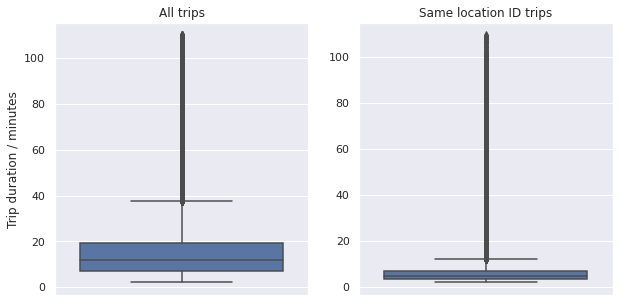

In [154]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(x=df['trip_duration'], ax=ax[0], orient='vert')
sns.boxplot(x=df.loc[df['pulocationid'] == df['dolocationid'], [
            'trip_duration']], ax=ax[1], orient='vert')
ax[0].set_ylabel('Trip duration / minutes')
ax[0].set_title('All trips')
ax[1].set_title('Same location ID trips')
plt.show()

Only trips with less than 60 minutes:

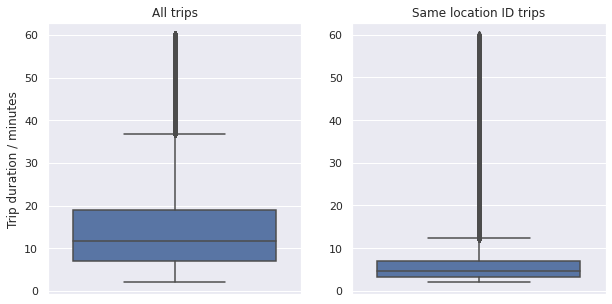

In [155]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(x=df.loc[df['trip_duration'] < 60, ['trip_duration']], ax=ax[0], orient='vert')
sns.boxplot(x=df.loc[(df['pulocationid'] == df['dolocationid']) & (df['trip_duration'] < 60), ['trip_duration']], ax=ax[1], orient='vert')
ax[0].set_ylabel('Trip duration / minutes')
ax[0].set_title('All trips')
ax[1].set_title('Same location ID trips')
plt.show()

The interquartile range (IQR) shrinks as expected.

## Trips from/to Queens airports

In [156]:
queens_airports_ids = (132, 138)

In [157]:
queens_df = df.loc[(df['pulocationid'].isin(queens_airports_ids)) |
                   (df['dolocationid'].isin(queens_airports_ids))]

In [158]:
queens_df['total_amount'].describe()

count   486017.000
mean        51.010
std         18.828
min          0.000
25%         39.300
50%         51.800
75%         66.000
max        361.420
Name: total_amount, dtype: float64

In [159]:
queens_df['trip_distance'].describe()

count   486017.000
mean        12.672
std          5.473
min          0.010
25%          8.720
50%         11.450
75%         17.510
max         57.800
Name: trip_distance, dtype: float64

In [160]:
queens_df['trip_duration'].describe()

count   486017.000
mean        37.520
std         19.160
min          2.033
25%         23.517
50%         34.167
75%         48.683
max        109.933
Name: trip_duration, dtype: float64

As expected, since the airports are far away from the city center and Manhattan, especially the JFK Airport, the trips are longer and more expensive.

Comparing with boxplots:

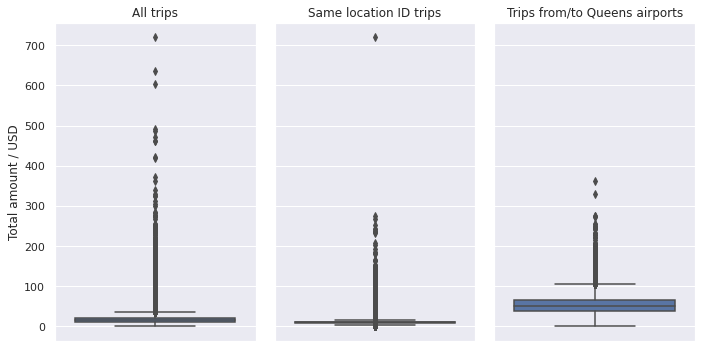

In [161]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5), tight_layout=True, sharey=True)
sns.boxplot(x=df['total_amount'], ax=ax[0], orient='vert')
sns.boxplot(x=df.loc[df['pulocationid'] == df['dolocationid'], [
            'total_amount']], ax=ax[1], orient='vert')
sns.boxplot(x=queens_df['total_amount'], ax=ax[2], orient='vert')
ax[0].set_ylabel('Total amount / USD')
ax[0].set_title('All trips')
ax[1].set_title('Same location ID trips')
ax[2].set_title('Trips from/to Queens airports')
ax[2].set_ylabel('')
plt.show()

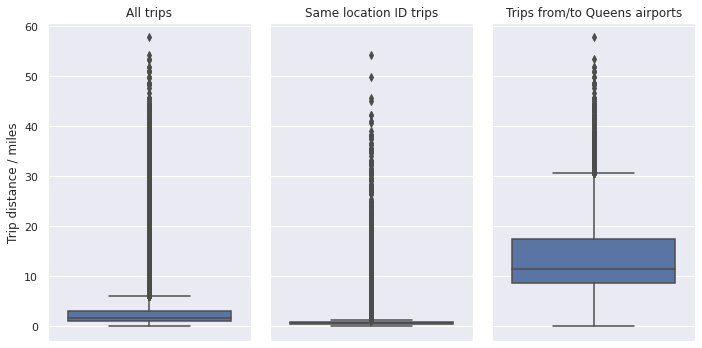

In [162]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5), tight_layout=True, sharey=True)
sns.boxplot(x=df['trip_distance'], ax=ax[0], orient='vert')
sns.boxplot(x=df.loc[df['pulocationid'] == df['dolocationid'], [
            'trip_distance']], ax=ax[1], orient='vert')
sns.boxplot(x=queens_df['trip_distance'], ax=ax[2], orient='vert')
ax[0].set_ylabel('Trip distance / miles')
ax[0].set_title('All trips')
ax[1].set_title('Same location ID trips')
ax[2].set_title('Trips from/to Queens airports')
ax[2].set_ylabel('')
plt.show()

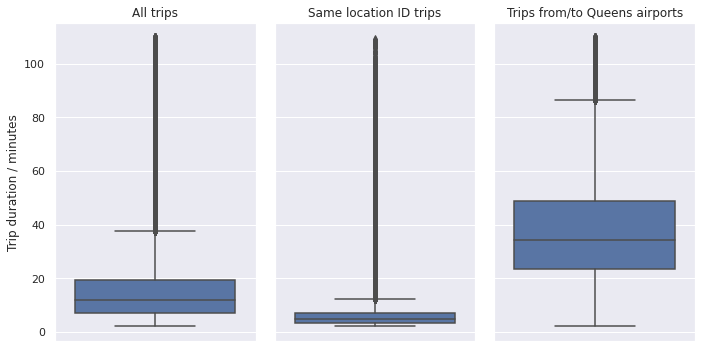

In [163]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5), tight_layout=True, sharey=True)
sns.boxplot(x=df['trip_duration'], ax=ax[0], orient='vert')
sns.boxplot(x=df.loc[df['pulocationid'] == df['dolocationid'], [
            'trip_duration']], ax=ax[1], orient='vert')
sns.boxplot(x=queens_df['trip_duration'], ax=ax[2], orient='vert')
ax[0].set_ylabel('Trip duration / minutes')
ax[0].set_title('All trips')
ax[1].set_title('Same location ID trips')
ax[2].set_title('Trips from/to Queens airports')
ax[2].set_ylabel('')
plt.show()

# Christmas and New Years Eve

## All city

In [164]:
all_trips_days_df = df.set_index('tpep_pickup_datetime').groupby(
    pd.Grouper(freq='D')).count()['total_amount']

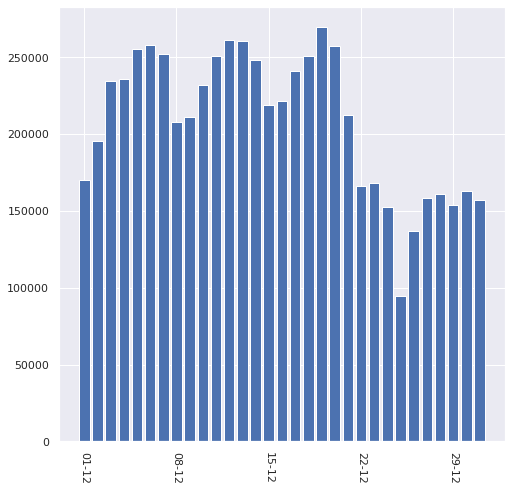

In [165]:
fig, ax = plt.subplots(figsize=(8, 8))

myFmt = mdates.DateFormatter("%d-%m")

ax.bar(all_trips_days_df.index, all_trips_days_df.values)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=6, interval=1))
ax.xaxis.set_major_formatter(myFmt)
ax.minorticks_on()
ax.xaxis.set_minor_locator(mdates.DayLocator())

for label in ax.get_xticklabels():
    label.set_rotation(-90)

plt.show()

There is a clearly periodic pattern in the previous plot. The dates in the label are Sundays. So the trip count increases from Monday to Friday, decreasing Saturday and with minimums at Sundays. The pattern changes from 22-12 onwards, the Christmas week, when an almost constant 150k trips per day pattern emerges except at 25-12, Christmas.

## Times Square

In [166]:
times_square_id = 230

In [167]:
times_square_trips = df.loc[df['dolocationid'] == times_square_id].set_index(
    'tpep_pickup_datetime').groupby(pd.Grouper(freq='D')).count()['total_amount']

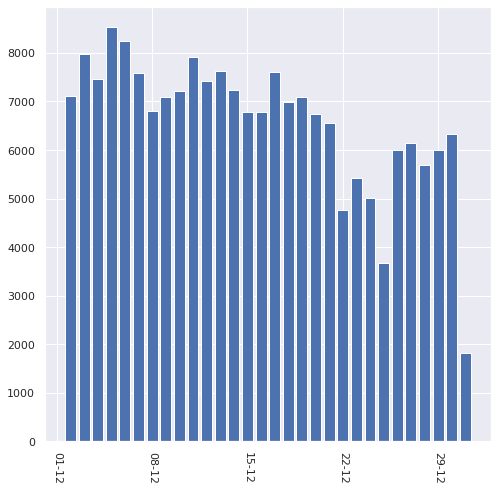

In [168]:
fig, ax = plt.subplots(figsize=(8, 8))

myFmt = mdates.DateFormatter("%d-%m")

ax.bar(times_square_trips.index[1:], times_square_trips.values[1:])

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=6, interval=1))
ax.xaxis.set_major_formatter(myFmt)
ax.minorticks_on()
ax.xaxis.set_minor_locator(mdates.DayLocator())

for label in ax.get_xticklabels():
    label.set_rotation(-90)

plt.show()

The Times Square behavior is similar to the rest of the city, except at New Years Eve. Since [there is a great celebration there](https://en.wikipedia.org/wiki/Times_Square_Ball), many streets and roads are closed.

In [169]:
df.loc[(df['dolocationid'] == times_square_id) & 
       (df['tpep_pickup_datetime'].dt.date == date(2019, 12, 31))]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,total_amount,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
2191097,2019-12-31 02:44:16,2019-12-31 02:47:18,1.000,0.160,230,230,7.300,Tuesday,Tuesday,2,2,3.033
6677593,2019-12-31 00:11:02,2019-12-31 00:20:10,1.000,0.400,230,230,10.800,Tuesday,Tuesday,0,0,9.133
6677607,2019-12-31 00:00:56,2019-12-31 00:10:05,1.000,0.900,142,230,10.800,Tuesday,Tuesday,0,0,9.150
6677608,2019-12-31 00:21:52,2019-12-31 00:24:13,1.000,0.300,48,230,7.300,Tuesday,Tuesday,0,0,2.350
6677647,2019-12-31 00:36:29,2019-12-31 00:54:09,3.000,3.500,151,230,18.300,Tuesday,Tuesday,0,0,17.667
...,...,...,...,...,...,...,...,...,...,...,...,...
6839571,2019-12-31 23:03:25,2019-12-31 23:20:46,2.000,1.400,164,230,15.300,Tuesday,Tuesday,23,23,17.350
6842851,2019-12-31 23:00:41,2019-12-31 23:03:35,1.000,0.600,100,230,8.800,Tuesday,Tuesday,23,23,2.900
6844611,2019-12-31 22:59:57,2019-12-31 23:18:20,1.000,1.480,90,230,19.560,Tuesday,Tuesday,22,23,18.383
6844648,2019-12-31 23:04:31,2019-12-31 23:15:03,1.000,0.320,100,230,11.300,Tuesday,Tuesday,23,23,10.533


In [170]:
times_square_trips_new_year_hours = df.loc[(df['dolocationid'] == times_square_id) & 
                                           (df['tpep_pickup_datetime'].dt.date == 
                                            date(2019, 12, 31))].groupby(by='dropoff_hour').count()['total_amount']

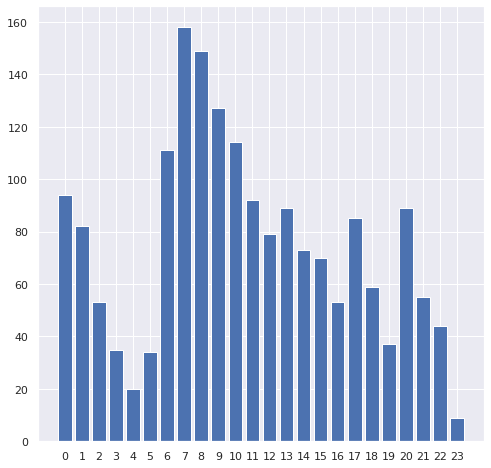

In [171]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.bar(times_square_trips_new_year_hours.index, times_square_trips_new_year_hours.values)
xticks = [i for i in range(24)]
ax.set_xticks(xticks)

plt.show()

Since the New Years Eve is not a holiday, there is the usual increase in trips in the early morning. However, the afternoon rush hours increase less than normal probably due to street closures and people staying to the celebration. There is a peak around 20 h probably due to people going to the celebration.